1. is IQR method used only on  normally distributed data?
2. Dont we have to deal with outliers if we are using robust  scaler?
3. how to specify the type of scaling with reobusctscaler?
4. sum encoding and hash encoding  and when to use them?
5. is pca an ML algorithm or a preprocessing technique?
6. can we avoid less frequent labels while encoding categorical features?
7. how to check linearity? is it checked nly with target variable?
8. does standard scaling assumes normality of features or it makes them normally distributed  after scaling?



* A datasetv With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. 
* Here we use Advanced regression techniques like random forest and gradient boosting you to predict the final price of each home.



In [134]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt
import sklearn;
import datetime as dt;
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [135]:
train = pd.read_csv('train.csv')
train_o = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [136]:
print(train.shape)
train.head(2)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [137]:
#Id column has no significance, so lets drop it
train.drop('Id',axis =1,inplace= True);

# moving target feature to the front for conveniece
value= train.pop('SalePrice')
train.insert(0,'SalePrice',value)

train.head(1)

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,208500,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal


In [138]:
# train.describe(include ='All').T

cat_col = train.select_dtypes(exclude= object )
num_col = train.select_dtypes(include = object )

In [139]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.0,214000.00,755000.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#### Fom the description, we can see the columns have outliers and they have high righ/left skewness

# 1. Dealing with outliers

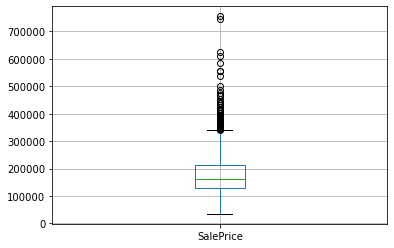

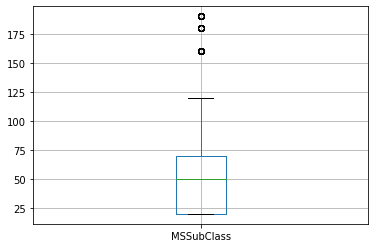

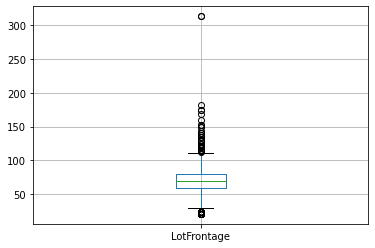

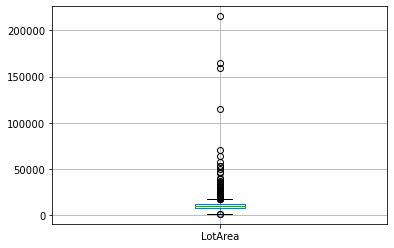

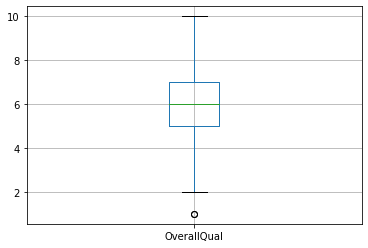

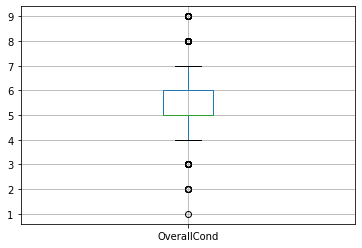

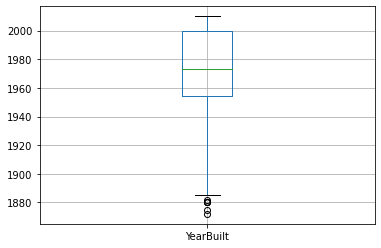

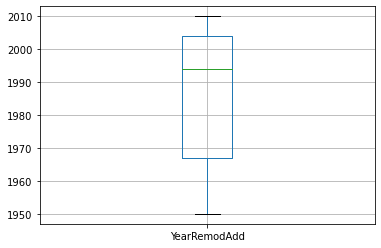

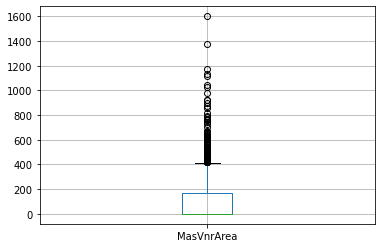

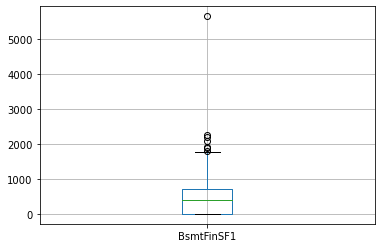

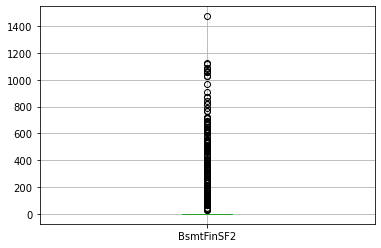

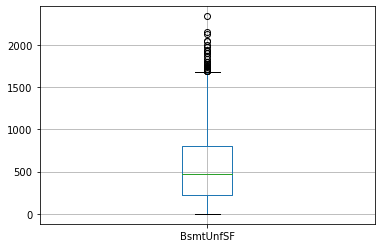

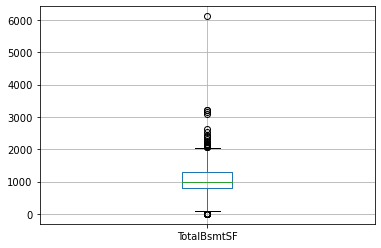

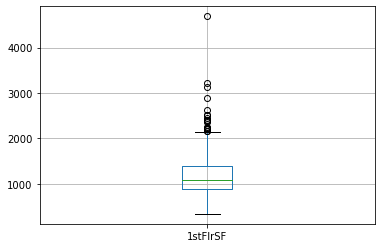

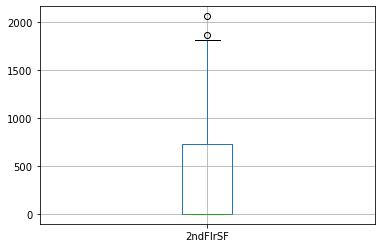

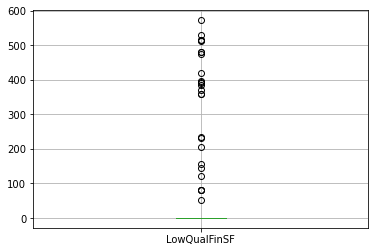

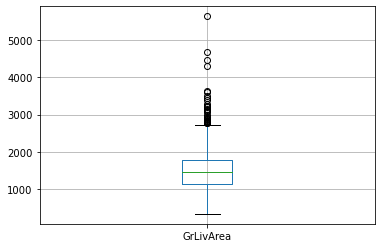

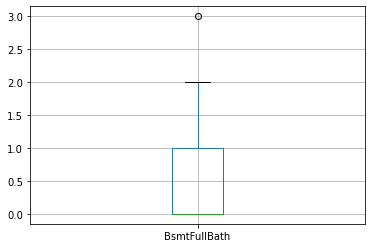

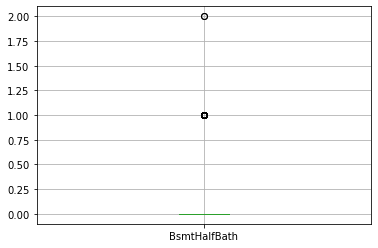

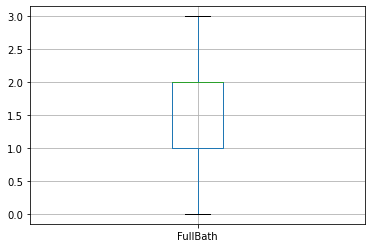

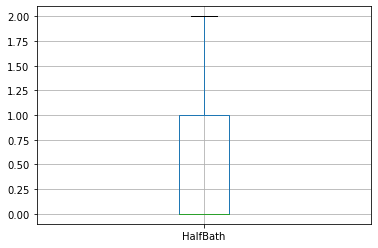

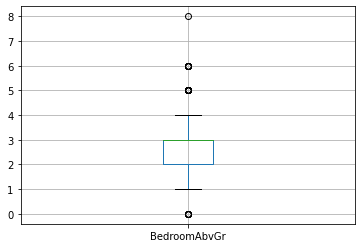

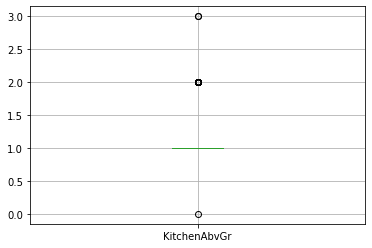

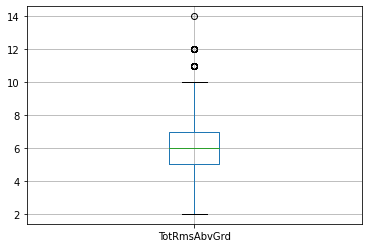

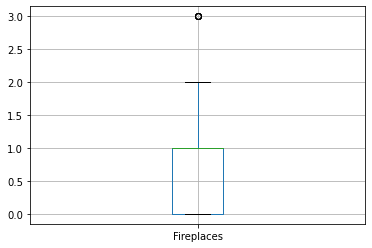

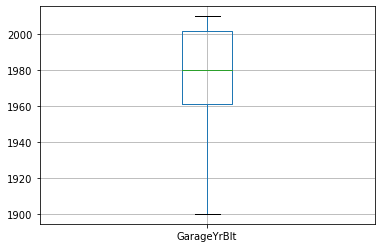

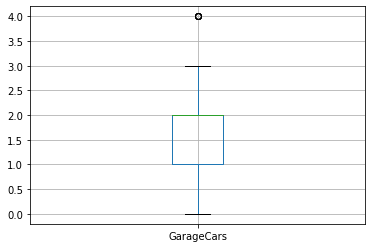

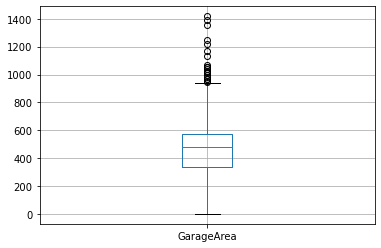

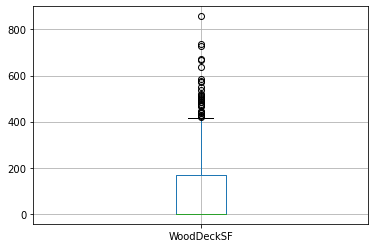

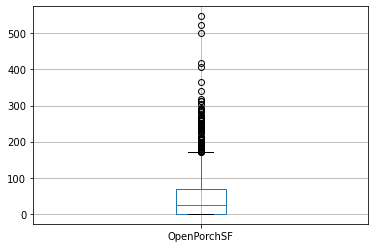

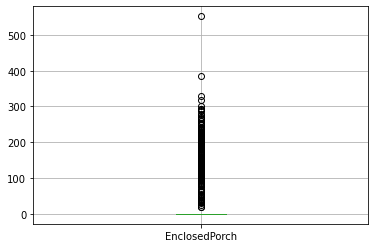

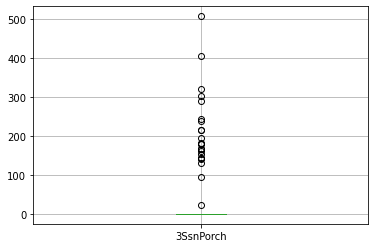

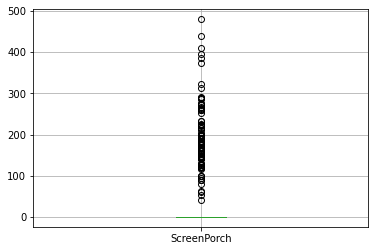

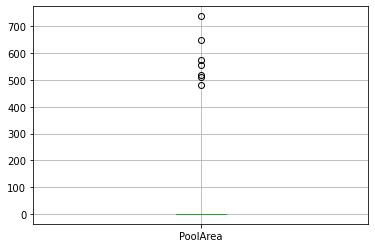

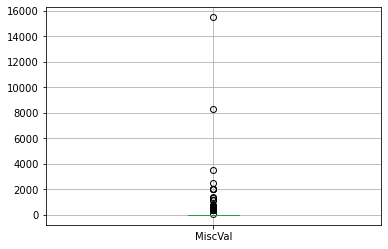

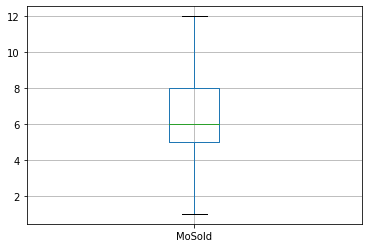

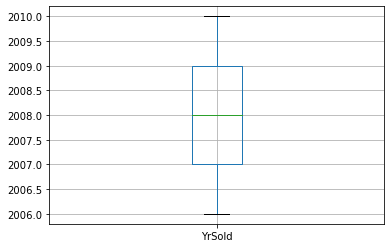

In [140]:
num_col = train.select_dtypes(exclude = object)
import matplotlib.pyplot as plt

for column in num_col:
    plt.figure()
    num_col.boxplot([column])

#ignore_it
#Not correct, will deal with outliers using robust scaler

num_col = train_o.select_dtypes(exclude = object)

for i in  num_col.columns:
    
        min_threshold, max_threshold = train[i].quantile([0.01,0.99]).round(2)
        train_o =  train_o[ train_o[  ( train_o[i] > min_threshold ) & ( train_o[i] < max_threshold ) ] ]
        
        
    #print(min_threshold ,max_threshold)

 #train[i] =train[  ( trainQ[i] > min_threshold ) & ( train[i] < max_threshold )] --wrong
    
    
train_o.head(20)

#not using  

from collections import Counter

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step= IQR * 1.5
        #Detect outlier and their indices
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

num_col = train.select_dtypes(exclude = object)

train.loc[detect_outliers(train,num_col)]





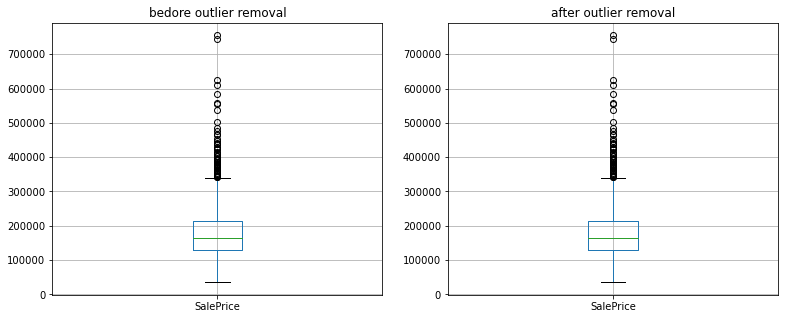

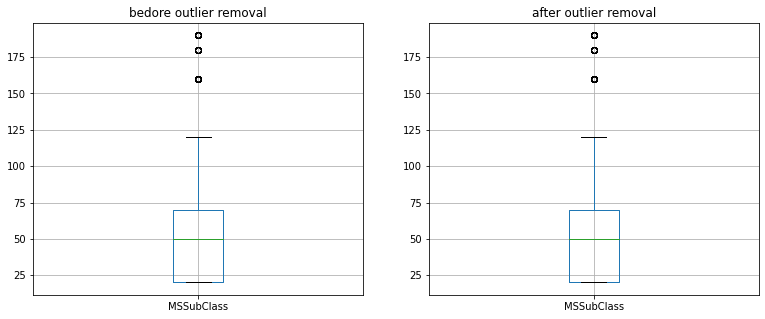

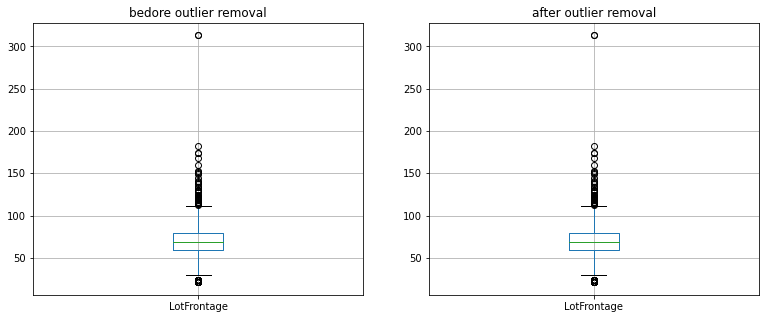

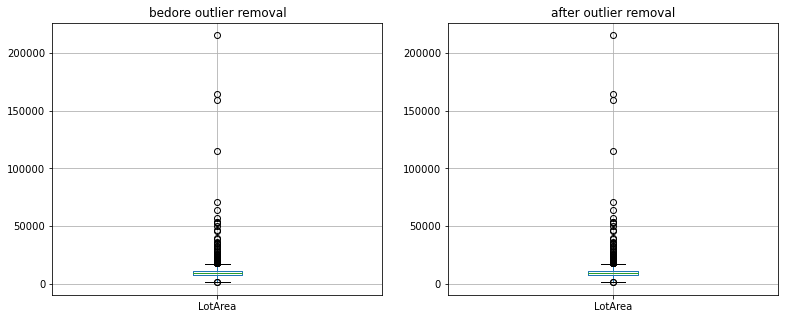

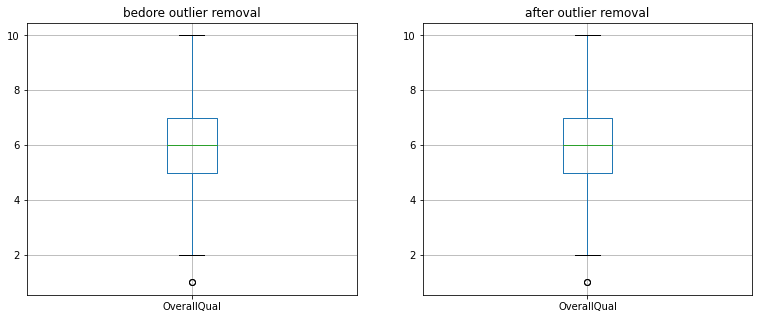

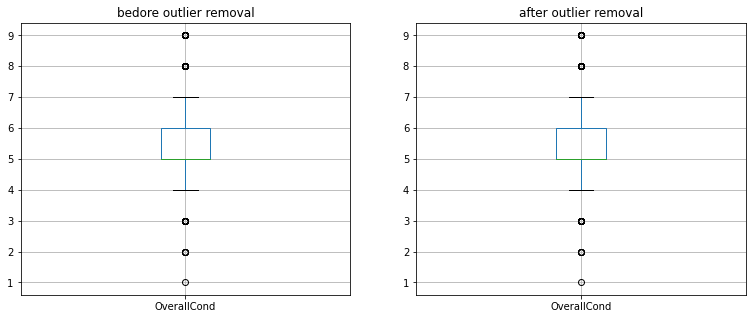

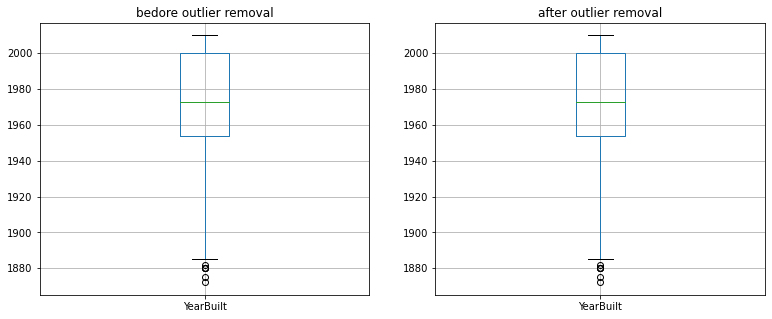

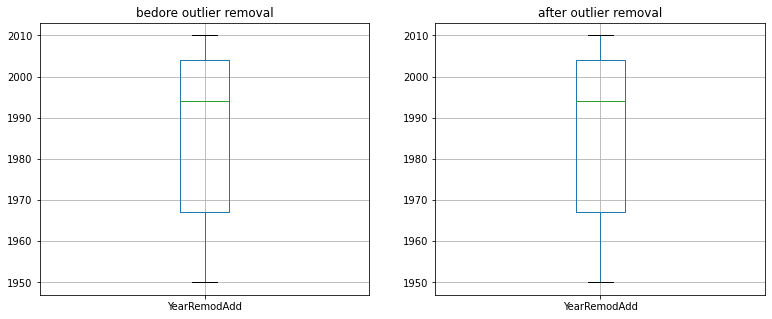

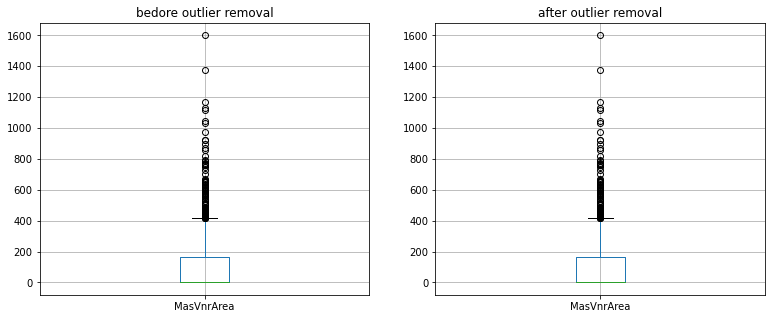

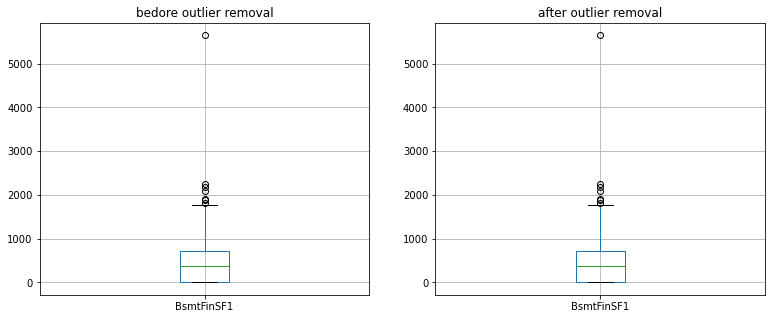

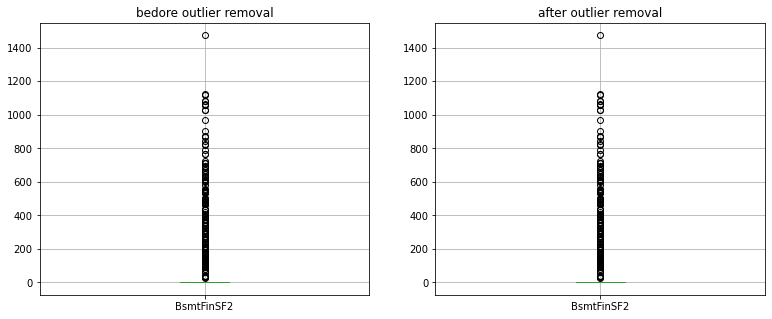

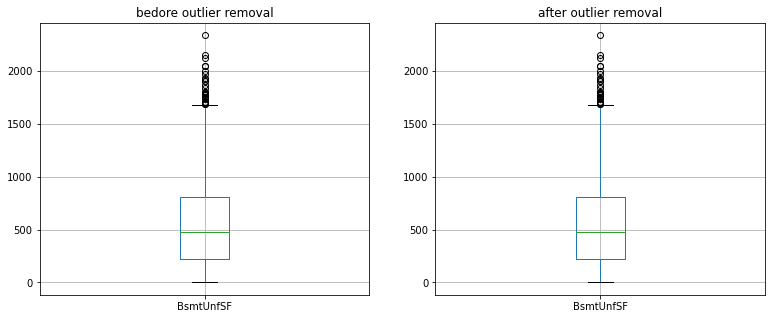

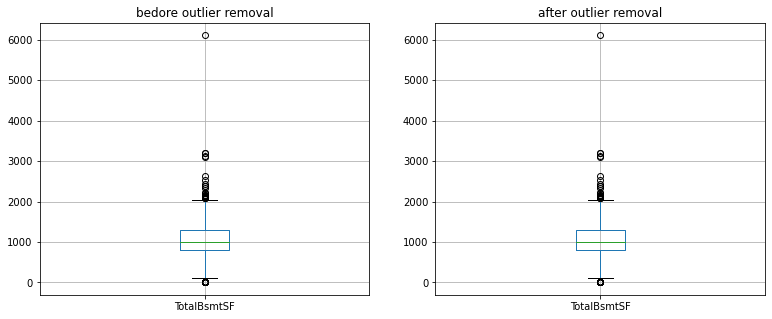

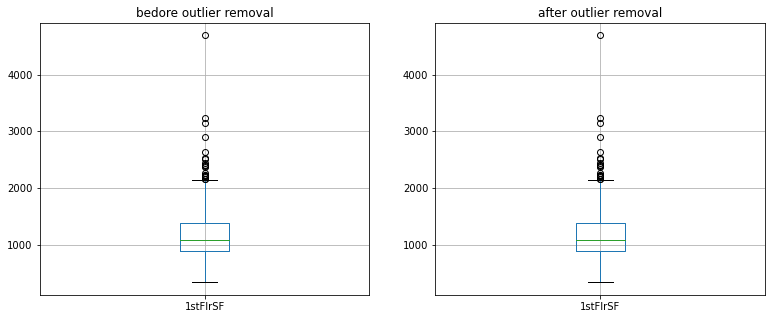

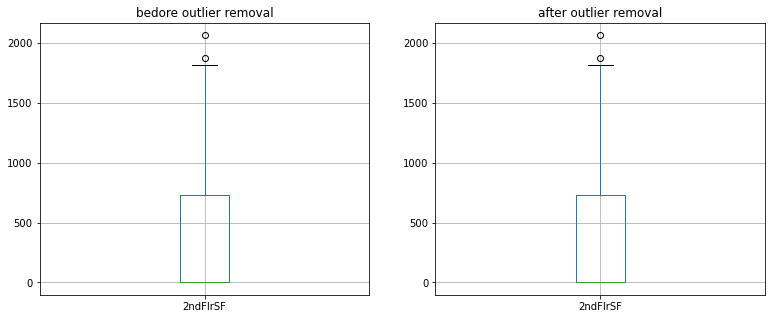

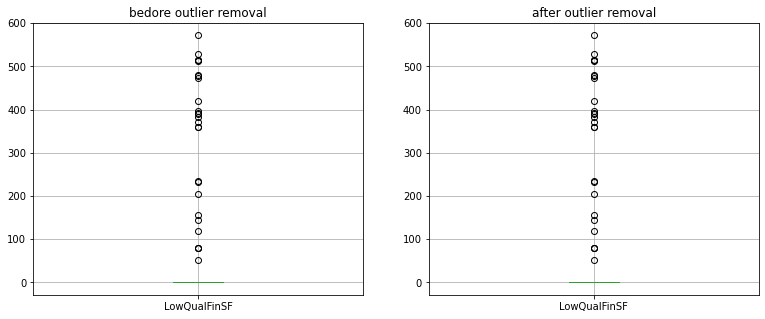

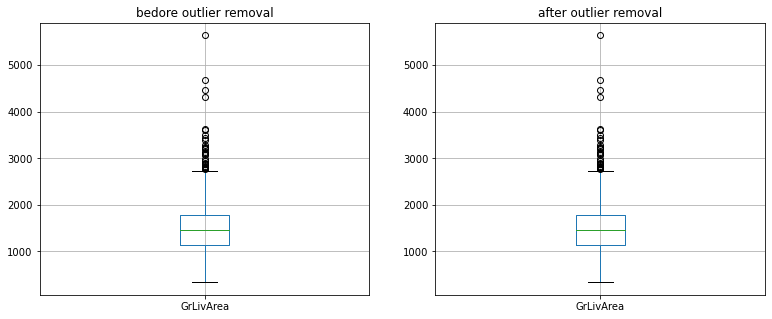

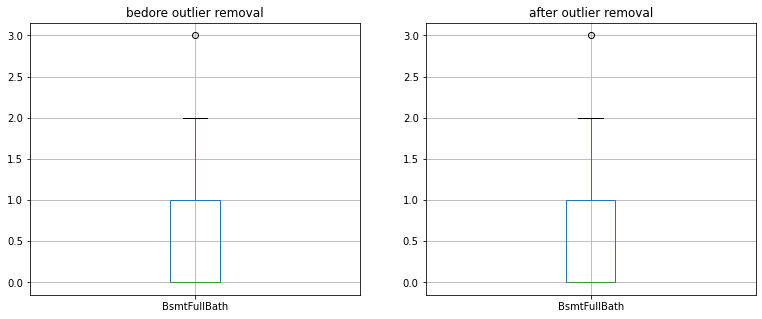

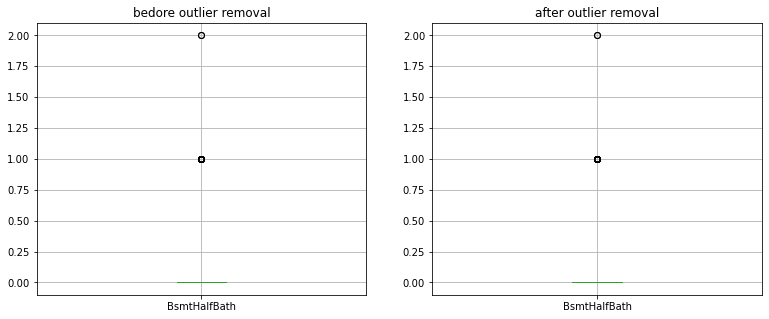

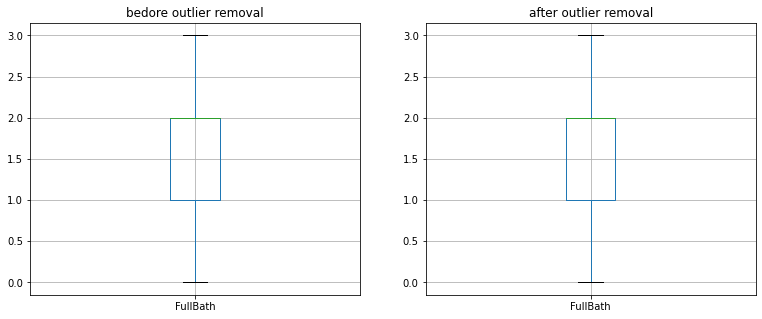

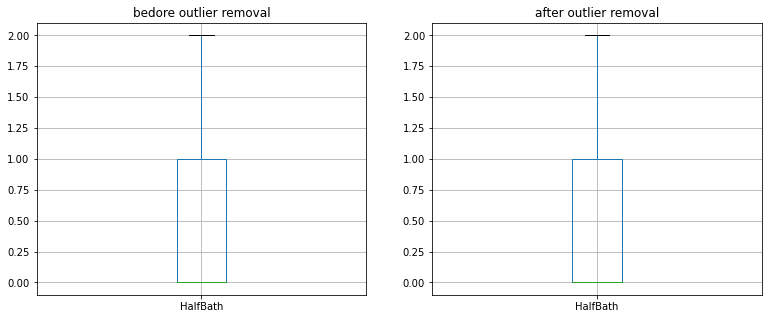

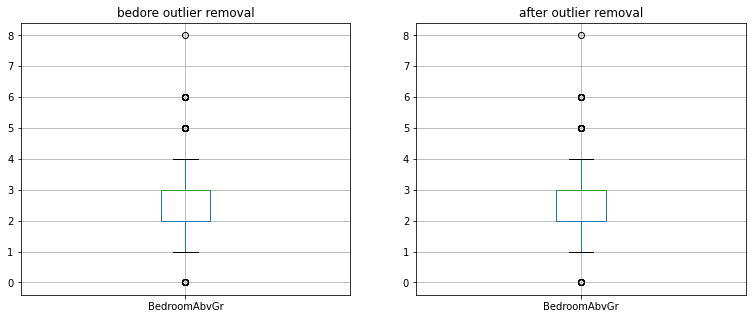

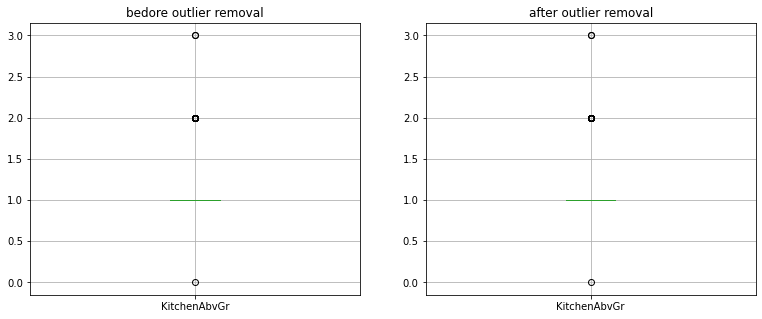

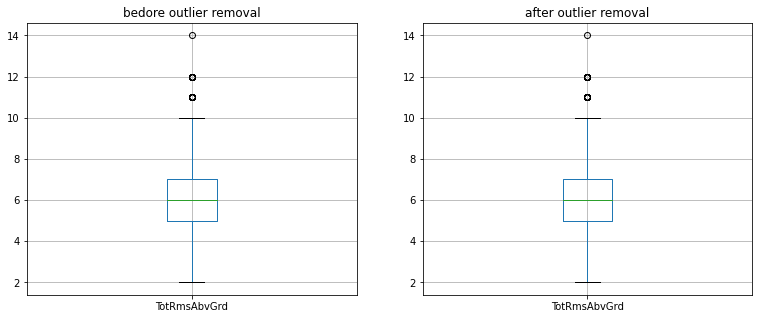

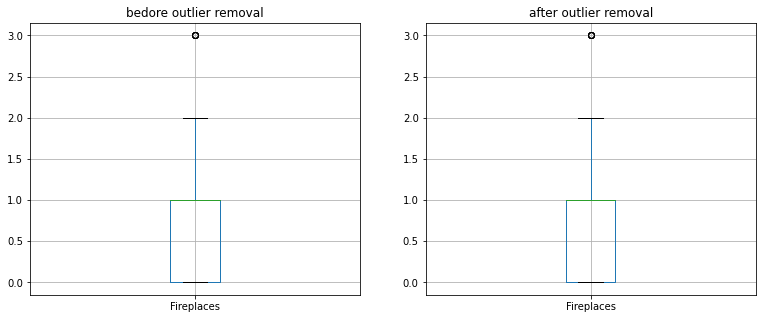

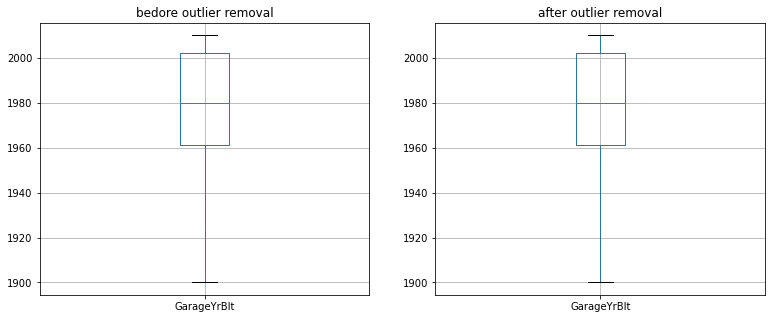

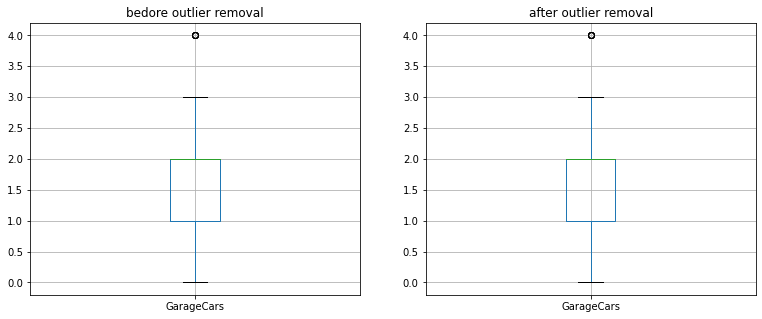

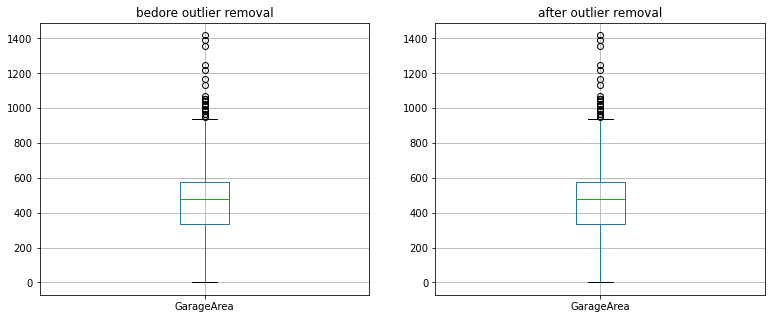

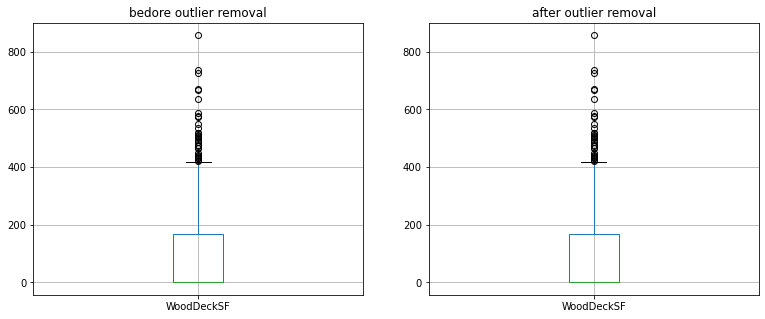

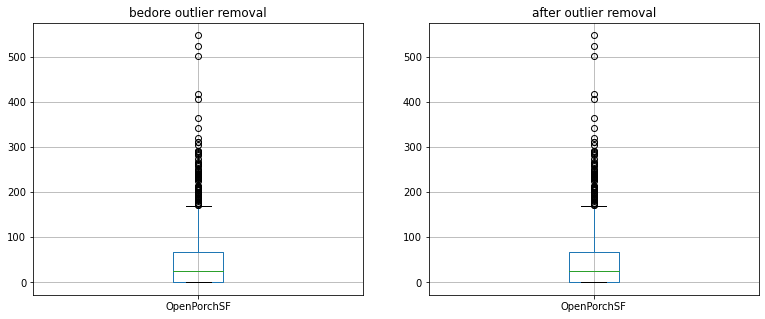

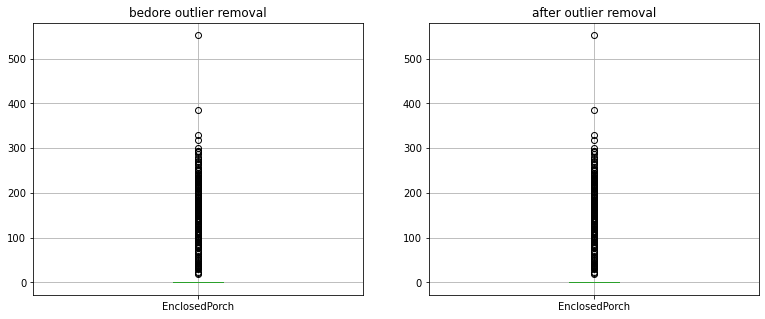

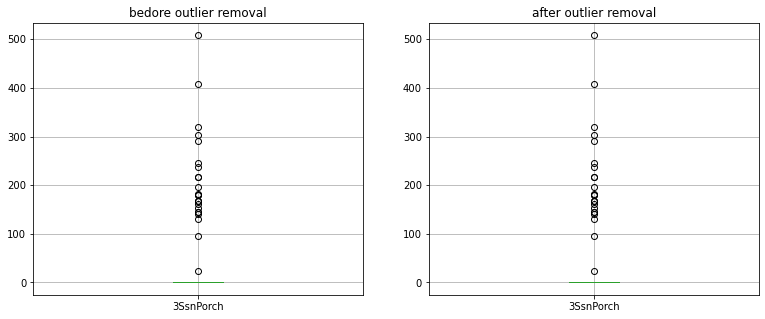

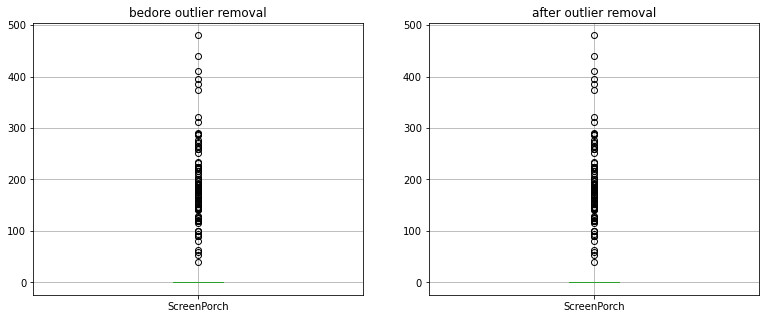

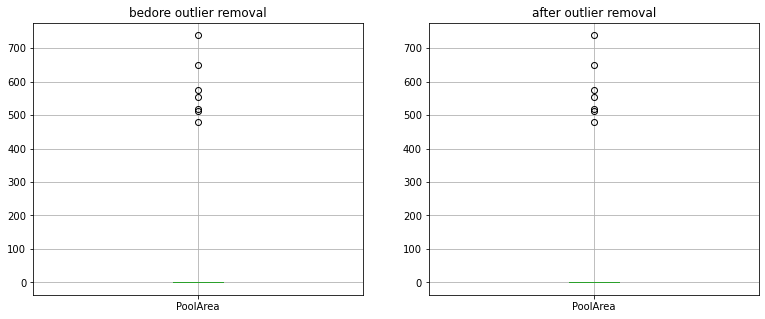

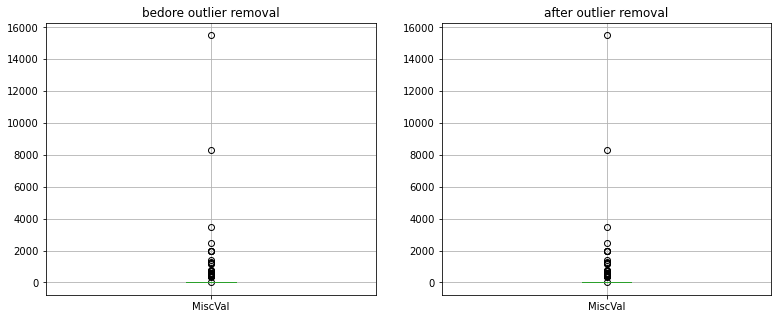

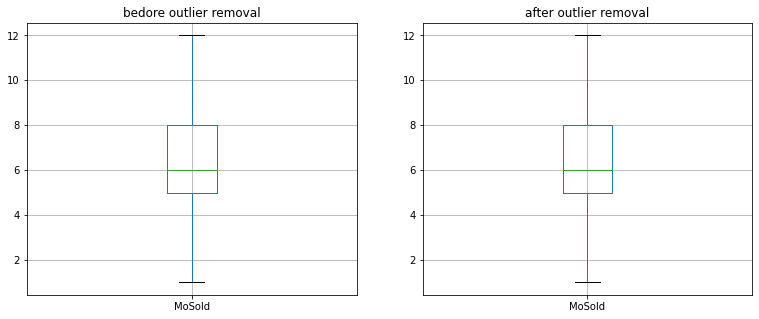

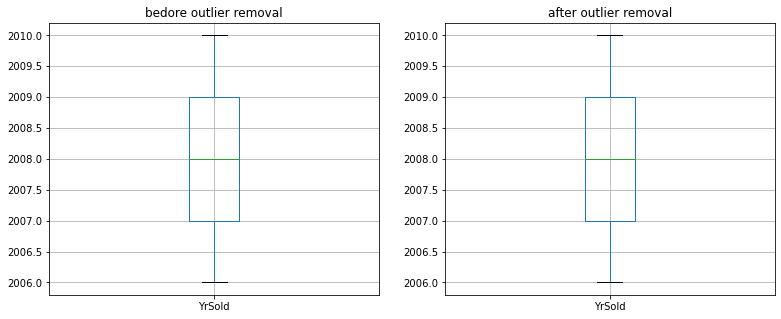

In [141]:


for var in num_col.columns:
    plt.figure(figsize=(13,5))
    
    plt.subplot(121)
    train.boxplot(var)
    plt.title('bedore outlier removal')
    
    plt.subplot(122)
    train_o.boxplot(var)
    plt.title('after outlier removal')

# analyzing missing values 

In [142]:
print(train.shape)


(1460, 80)


In [143]:
# missing_values before outlier romoval
## Let us capture all the nan values

for i in train.columns:
    if train[i].isnull().sum() >1:
        print('nulls in '+i+ ' = ' + '{} %'.format( np.round ( train[i].isnull().sum()*100 / len(train),2) ) )

nulls in LotFrontage = 17.74 %
nulls in Alley = 93.77 %
nulls in MasVnrType = 0.55 %
nulls in MasVnrArea = 0.55 %
nulls in BsmtQual = 2.53 %
nulls in BsmtCond = 2.53 %
nulls in BsmtExposure = 2.6 %
nulls in BsmtFinType1 = 2.53 %
nulls in BsmtFinType2 = 2.6 %
nulls in FireplaceQu = 47.26 %
nulls in GarageType = 5.55 %
nulls in GarageYrBlt = 5.55 %
nulls in GarageFinish = 5.55 %
nulls in GarageQual = 5.55 %
nulls in GarageCond = 5.55 %
nulls in PoolQC = 99.52 %
nulls in Fence = 80.75 %
nulls in MiscFeature = 96.3 %


In [144]:
#the last 3 columns have more than 80 % null values and they are of no use, lets drop them.
train.drop(columns=['Alley','PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)

In [145]:
#since firequ has 50% of missing values. replacing it with mode() will decrese other types, so lets fill it with front and back values
train['FireplaceQu'].bfill(inplace=True)
train['FireplaceQu'].ffill(inplace=True)
train.columns[train.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [146]:
train.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,208500,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,181500,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,223500,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,140000,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,250000,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


# 1.Replacing /imputing Misssing values

In [147]:
## lets seperate numerical features which are missing  and replace with mean
num_null = [ feature for feature in train.columns if train[feature].isnull().sum() >1 and train[feature].dtypes != 'O']

for feature in num_null:
    print("{}: {}% missing values".format(feature,np.round(train[feature].isnull().mean(),3)))

LotFrontage: 0.177% missing values
MasVnrArea: 0.005% missing values
GarageYrBlt: 0.055% missing values


In [148]:
# replacing numerical values with mean()
num_col= train.select_dtypes(include = 'number')
for i in num_col:
    train[i].fillna(train[i].mean(), inplace=True)

train.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,208500,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,181500,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,223500,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,140000,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,250000,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [149]:
# replacing remaining (categorical) values with mode

train.bfill(inplace = True)
train.ffill(inplace = True)
    
# total_null_values after replacement   
print( train.isnull().sum() )



SalePrice        0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 76, dtype: int64


# Handling temporal(date time) variables
*  Here values are given in year, this format is of no use  so lets calculate no.of yrs from all columns
* we only need year built, yearsold and month sold has no significance in predict price, so let's drop it.


In [150]:

train[['YearRemodAdd', 'YearBuilt', 'YrSold', 'GarageYrBlt']].head(3)

,YearRemodAdd,YearBuilt,YrSold,GarageYrBlt
0,2003,2003,2008,2003.0
1,1976,1976,2007,1976.0
2,2002,2001,2008,2001.0


In [151]:
# let's take date time features and convert them to yrs / months old

year_features= ['YearRemodAdd','YearBuilt','YrSold','GarageYrBlt']


train['date'] = pd.to_datetime('today').date()
train['curr_year'] = pd.DatetimeIndex(train['date']).year

for i in year_features:
    train[i] = train['curr_year'] - train[i]

train[['YearRemodAdd', 'YearBuilt', 'YrSold', 'GarageYrBlt']].head()

,YearRemodAdd,YearBuilt,YrSold,GarageYrBlt
0,18,18,13,18.0
1,45,45,14,45.0
2,19,20,13,20.0
3,51,106,15,23.0
4,21,21,13,21.0


In [152]:
train.drop(columns=['date','curr_year','YrSold','MoSold'], axis = 1, inplace = True)

In [153]:
train[['YearRemodAdd','YearBuilt','GarageYrBlt']].head()

,YearRemodAdd,YearBuilt,GarageYrBlt
0,18,18,18.0
1,45,45,45.0
2,19,20,20.0
3,51,106,23.0
4,21,21,21.0


In [154]:
# from data descriptio.txt, we grtto know that garage qual and exterqual, bsmntnsf, condition2 can be obtained from other featues, so lets drop them
# but we already removed garage condition so dont remove garage qual.
train.drop(columns=['Condition2','BsmtUnfSF','OverallQual','ExterQual','Exterior2nd'], axis = 1, inplace = True)

In [158]:
train.select_dtypes(include='number').columns

Index(['SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

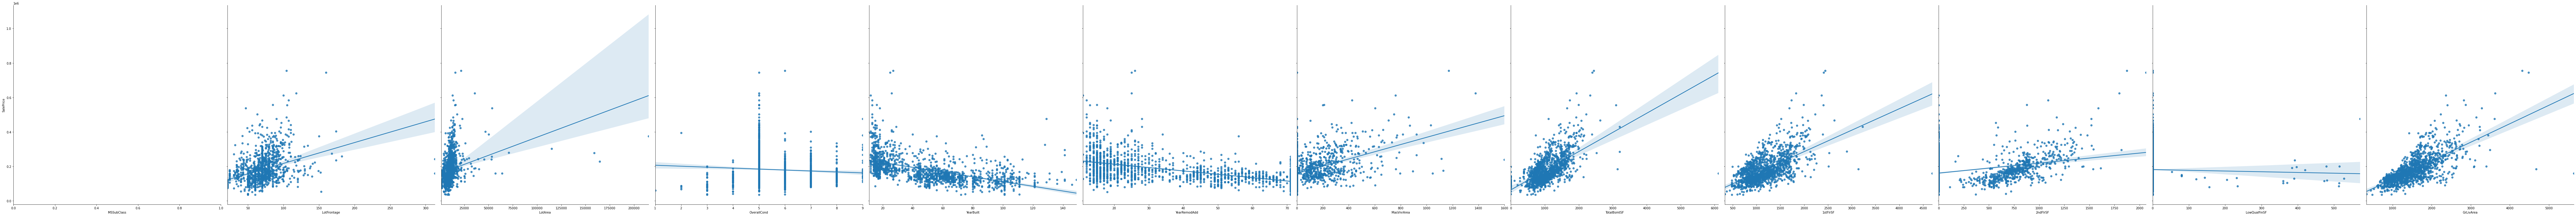

In [163]:
sns.pairplot(train, x_vars=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'], y_vars=['SalePrice'],
            height=10, aspect=1.0, kind="reg");

# visualizing data distribution using distplot

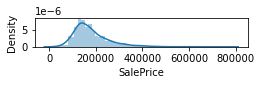

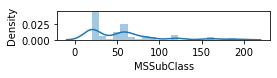

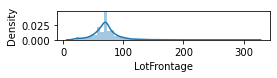

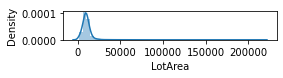

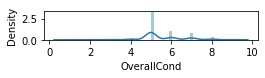

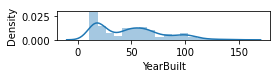

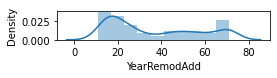

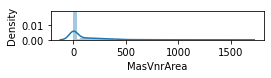

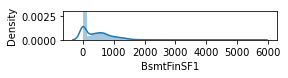

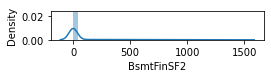

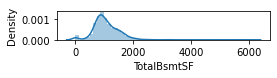

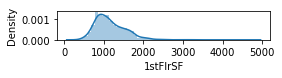

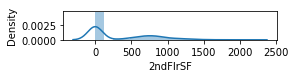

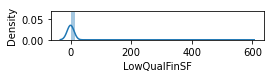

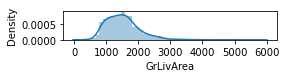

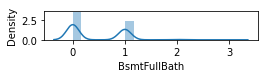

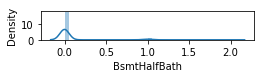

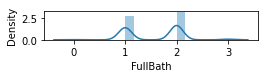

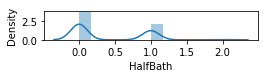

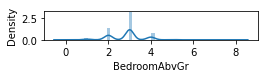

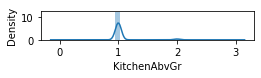

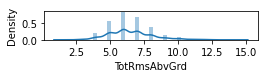

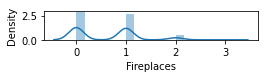

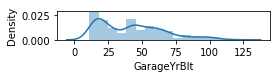

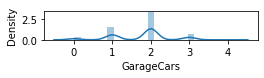

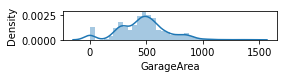

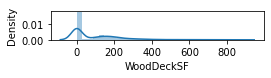

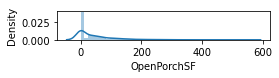

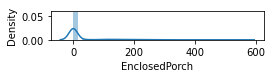

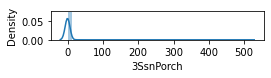

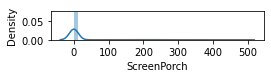

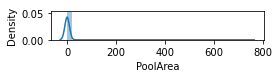

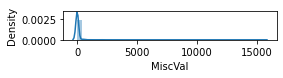

In [78]:
for i in  train.select_dtypes(exclude=object).columns:
    plt.figure(figsize=(13,5))
    plt.subplot(831)
    sns.distplot(train[i])

    

# visualization of different scaling

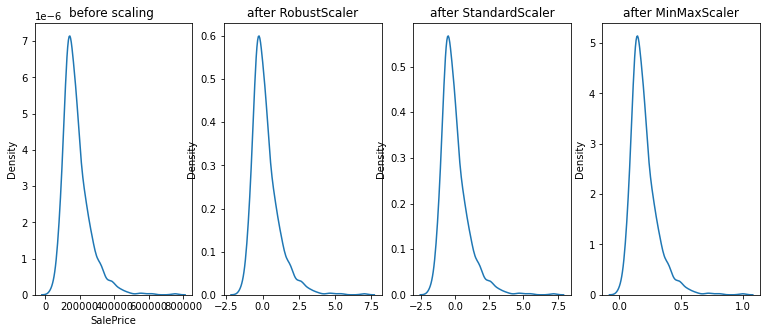

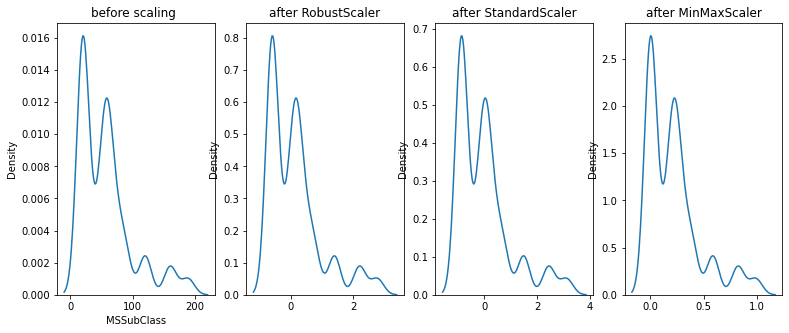

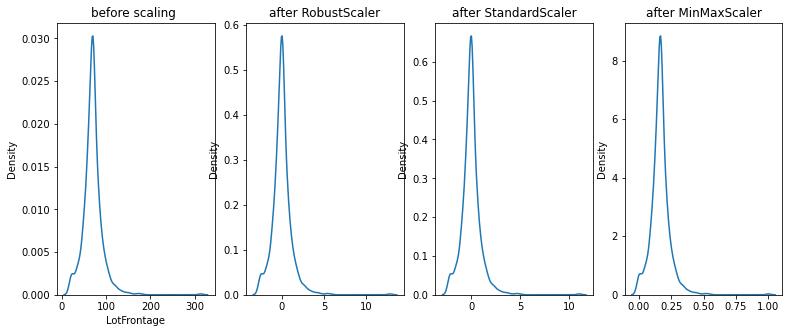

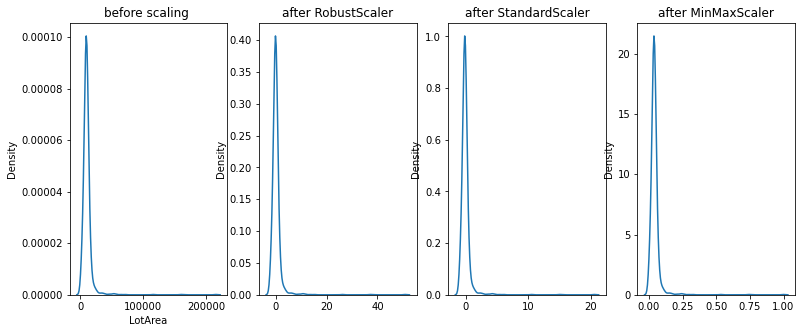

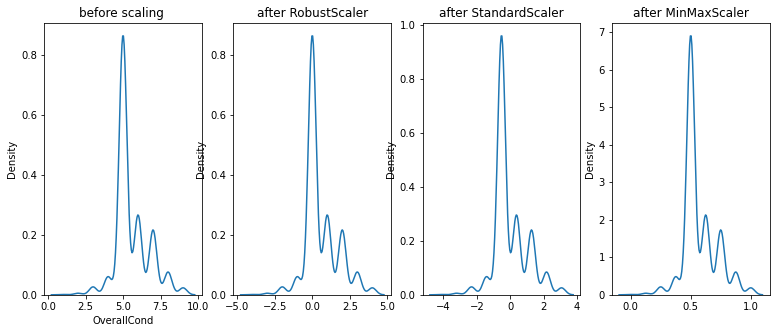

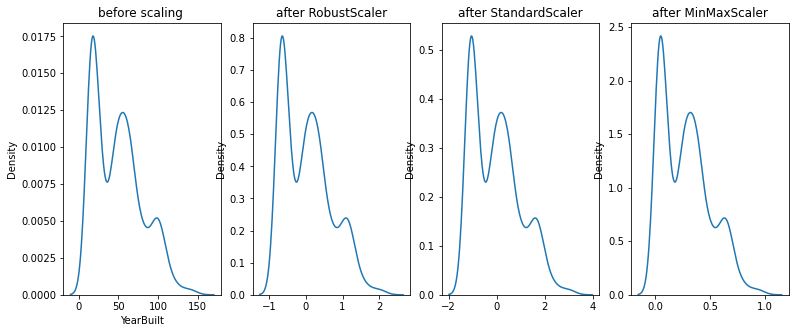

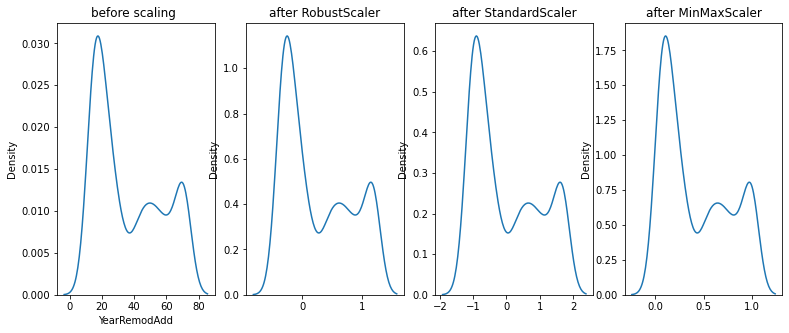

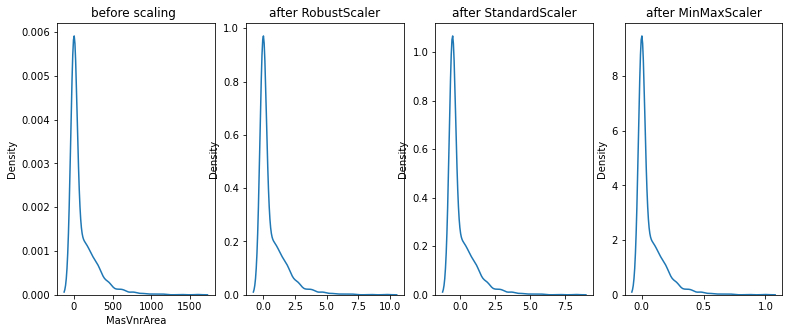

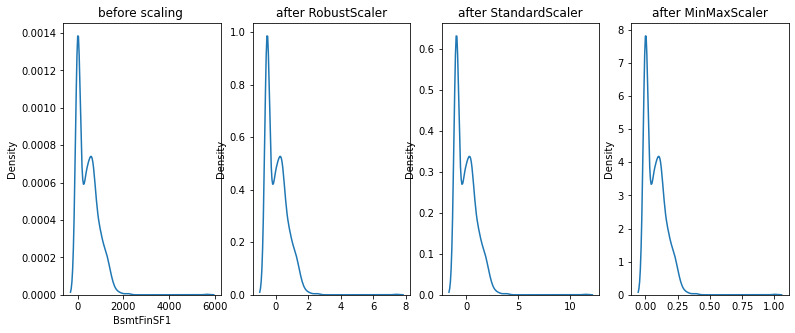

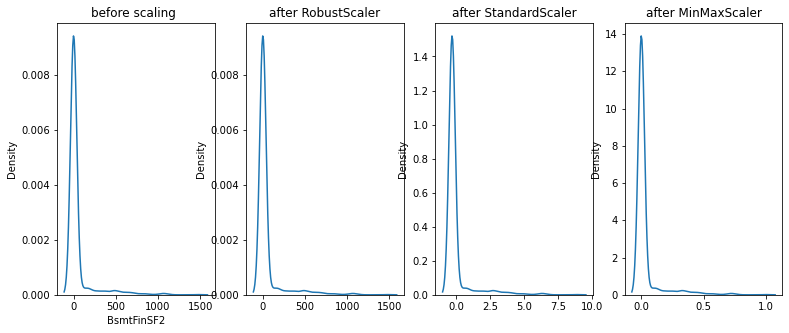

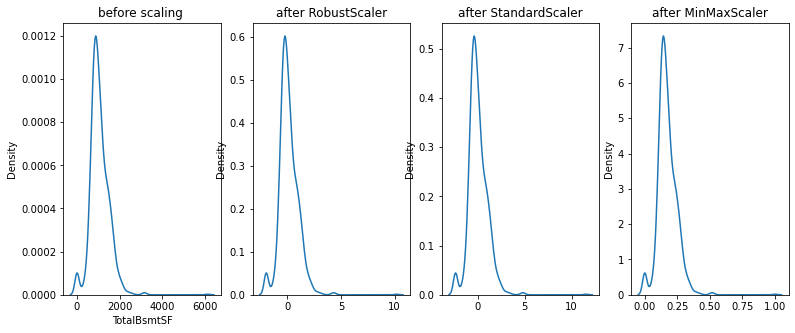

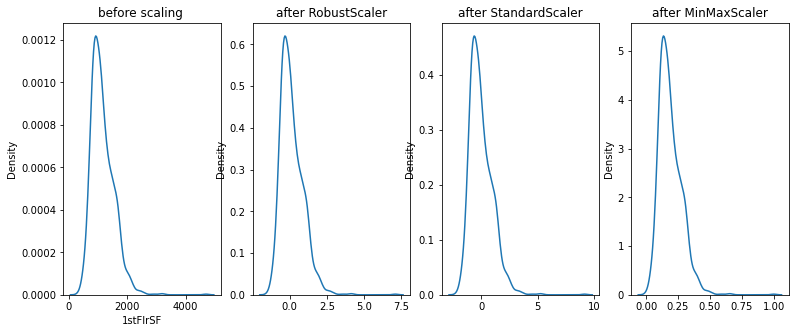

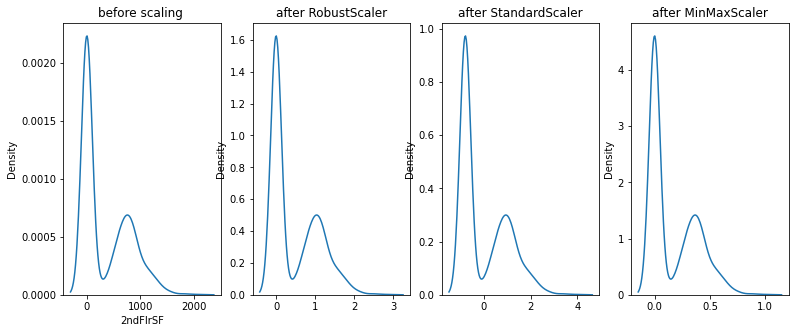

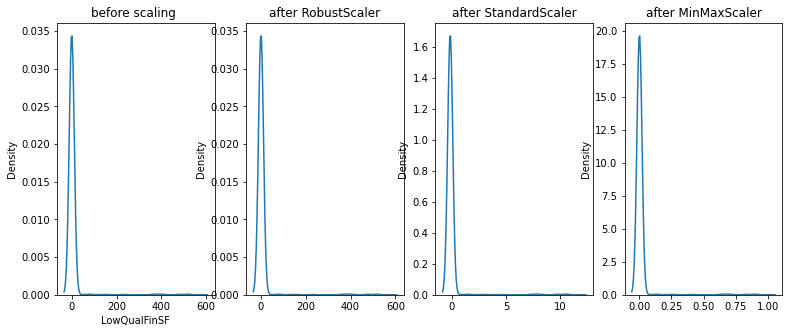

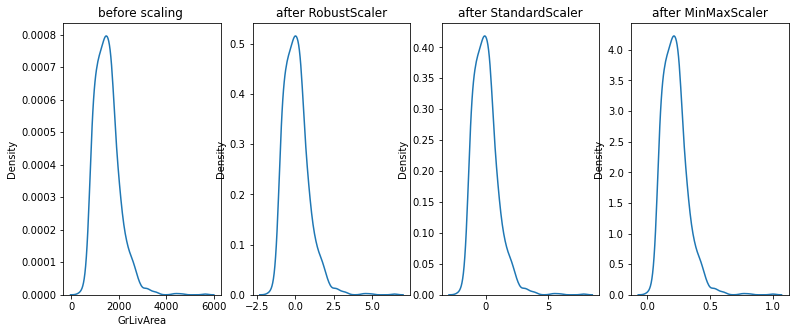

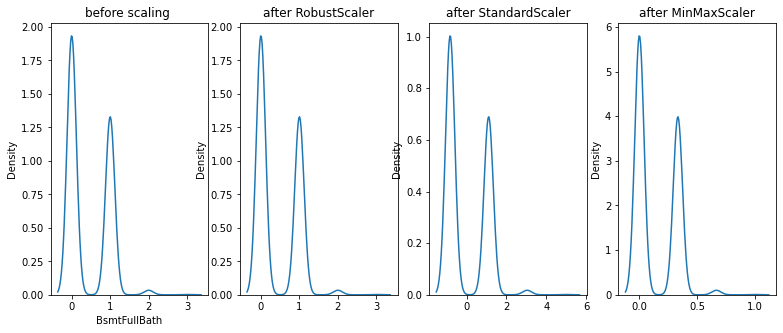

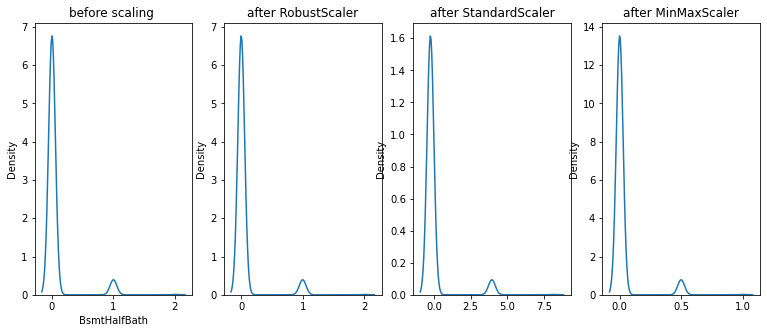

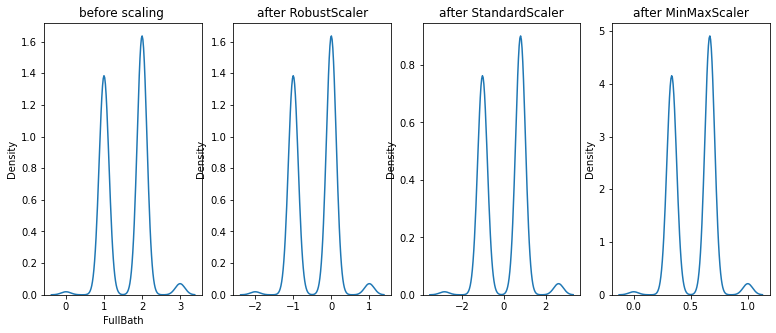

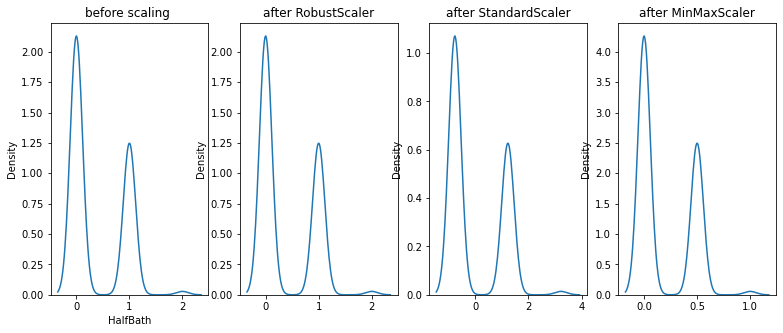

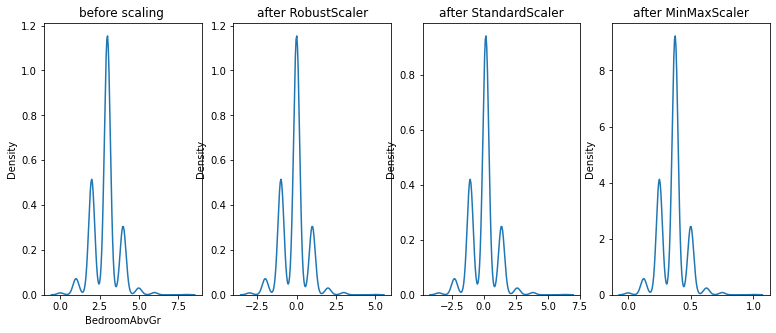

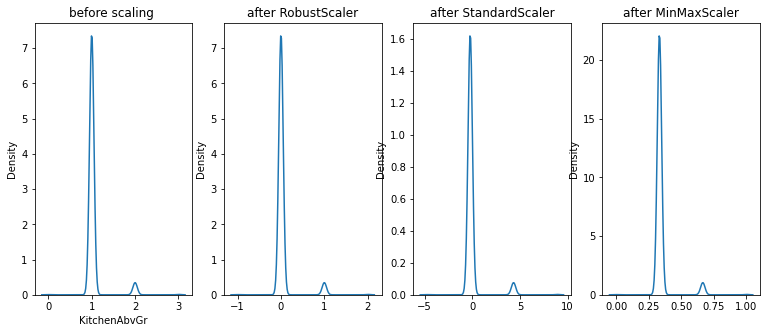

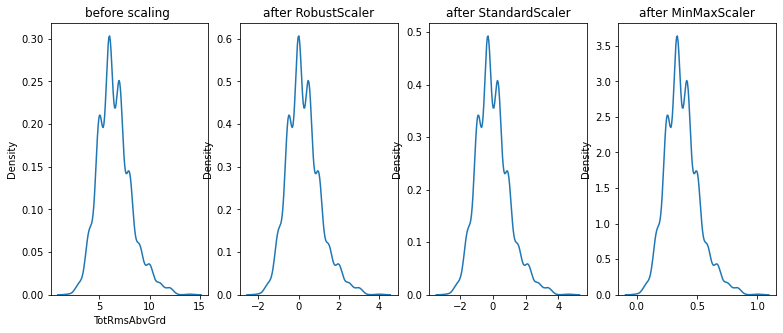

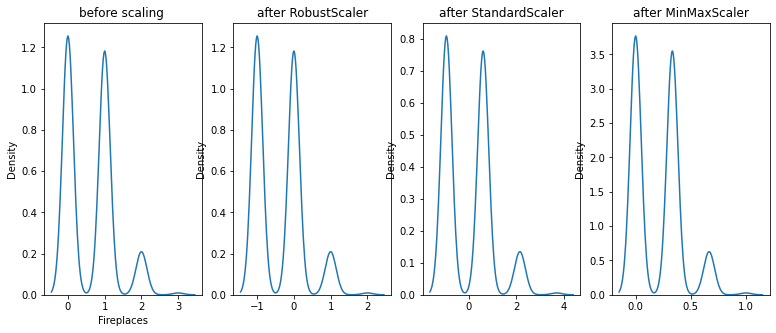

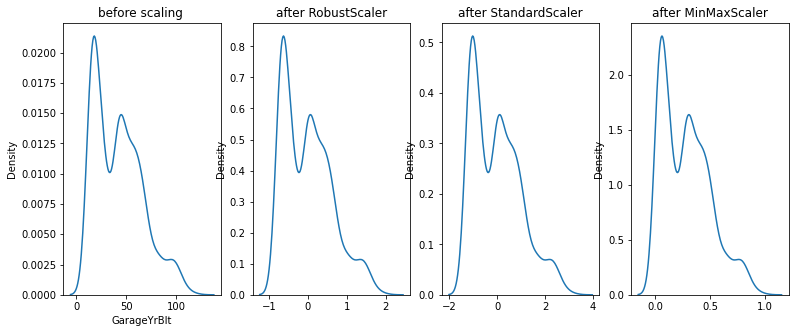

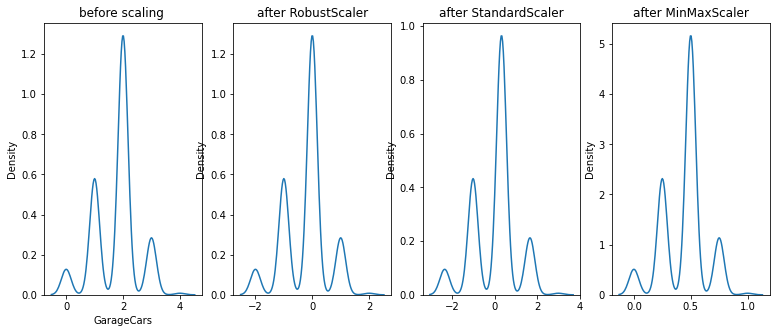

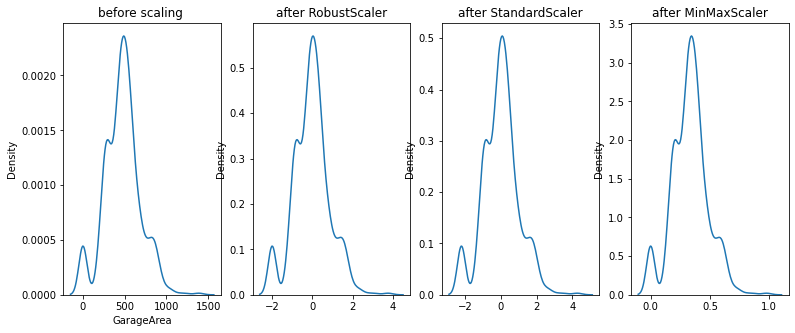

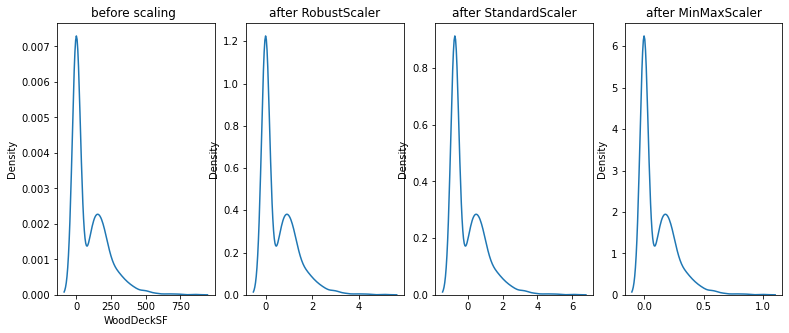

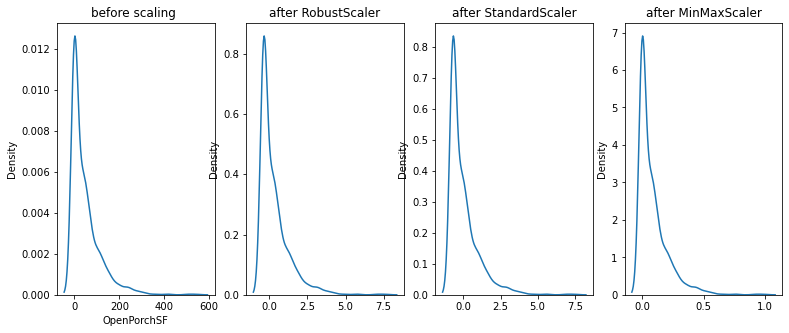

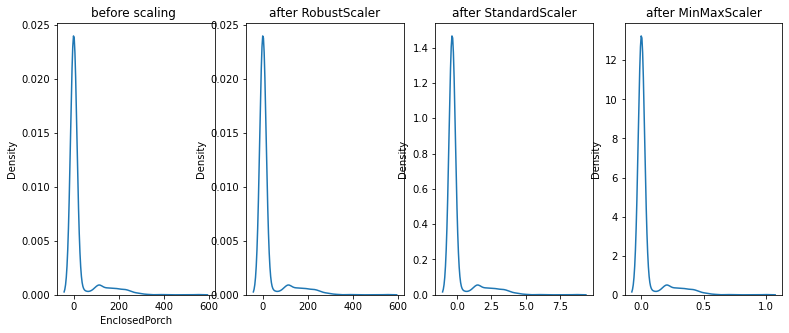

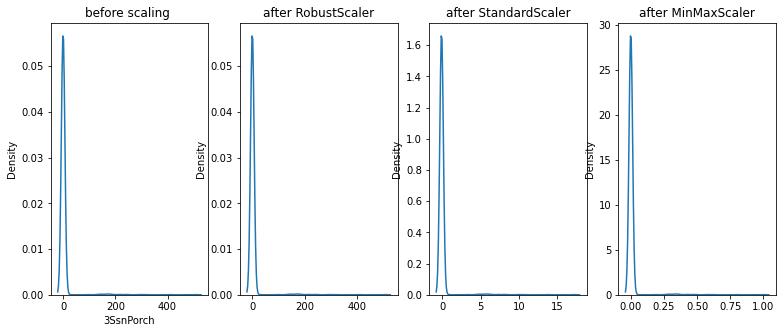

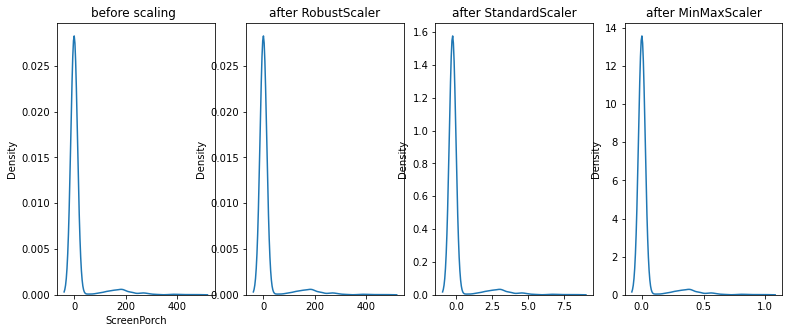

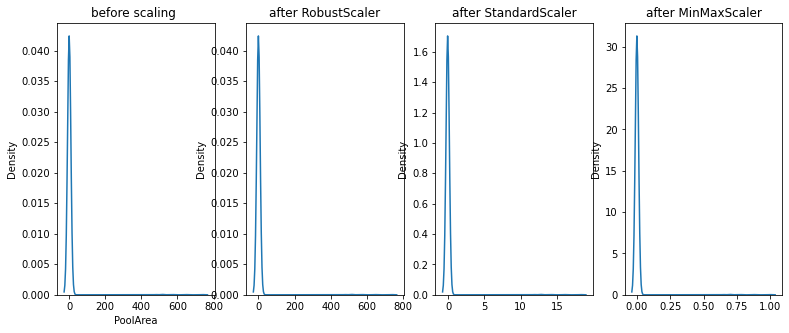

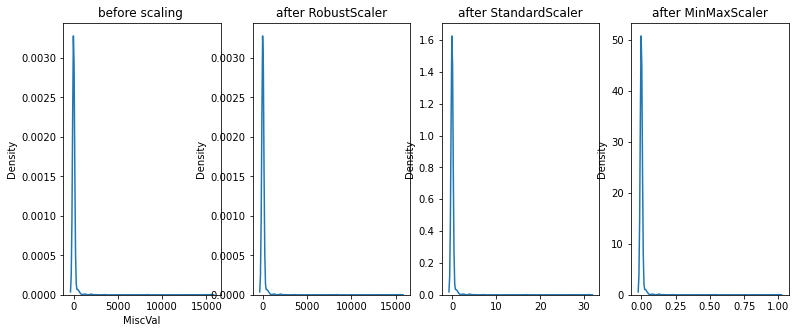


## Just separately scale and one-hot-encode the separate columns as needed:

#Import libraries and download example data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

dataset = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
print(dataset.head(5))

#Define which columns should be encoded vs scaled
columns_to_encode = ['rank']
columns_to_scale  = ['gre', 'gpa']

#Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

#Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(train[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(dataset[columns_to_encode])

#Concatenate (Column-Bind) Processed Columns Back Together
processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)

print(pd.DataFrame(processed_data).head())



## scaling the numerical features  using robustscaler

In [80]:

#select all numerical variables and copy paste it
train.select_dtypes(exclude=object).columns
train.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition
0,208500,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,Y,0,61,0,0,0,0,0,WD,Normal
1,181500,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,Y,298,0,0,0,0,0,0,WD,Normal
2,223500,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,Y,0,42,0,0,0,0,0,WD,Normal
3,140000,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,Y,0,35,272,0,0,0,0,WD,Abnorml
4,250000,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,Y,192,84,0,0,0,0,0,WD,Normal


In [81]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
scaled_columns_rs  = rs.fit_transform(train[columns_to_scale])

scaled_df_rs = pd.DataFrame(data=scaled_columns_rs, columns=['SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] )


mm = MinMaxScaler()
scaled_columns_mm  = mm.fit_transform(train[columns_to_scale])

scaled_df_mm = pd.DataFrame(data=scaled_columns_mm, columns=['SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] )





In [82]:
#train.info()

## feature scaling exluding target variable

In [84]:
columns_to_scale = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
TE_scaled_columns_rs  = rs.fit_transform(train[columns_to_scale])

TE_scaled_df_rs = pd.DataFrame(data=TE_scaled_columns_rs, columns=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] )


mm = MinMaxScaler()
TE_scaled_columns_mm  = mm.fit_transform(train[columns_to_scale])

TE_scaled_df_mm = pd.DataFrame(data=TE_scaled_columns_mm, columns=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] )

TE_scaled_df_rs['SalePrice'] = train['SalePrice']
TE_scaled_df_mm['SalePrice'] = train['SalePrice']



In [90]:
value = TE_scaled_df_rs.pop('SalePrice')
TE_scaled_df_rs.insert(0,'SalePrice',value)
value = TE_scaled_df_mm.pop('SalePrice')
TE_scaled_df_mm.insert(0,'SalePrice',value)

### seperating numerical variables into discrete and continuous  variables

In [91]:
##Numerical variables are usually of 2 type
##1. Continous variable and Discrete Variables
numerical_features = train.select_dtypes(exclude = object)
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<=25 and feature not in year_features]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + year_features]
print("Continuous feature Count {}".format(len(continuous_feature)))

Discrete Variables Count: 15
Continuous feature Count 15


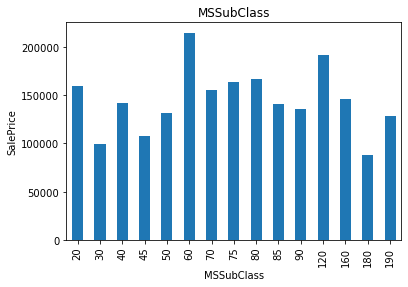

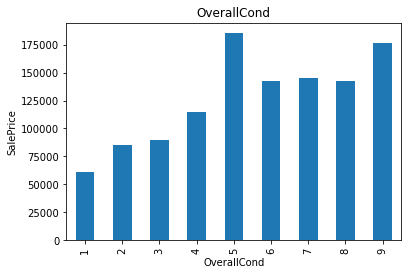

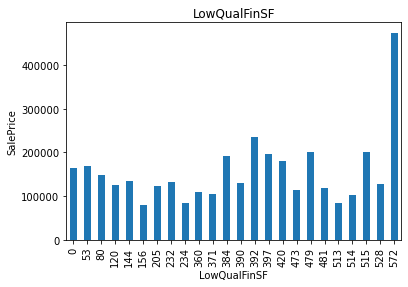

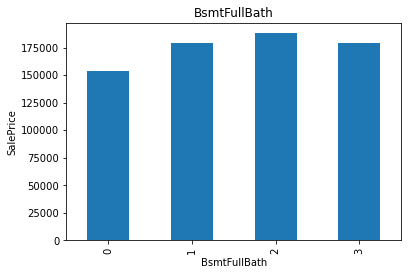

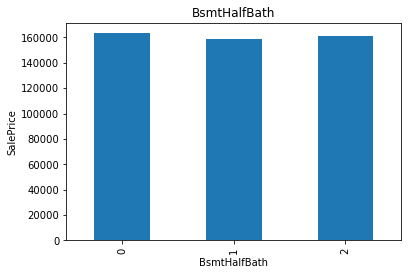

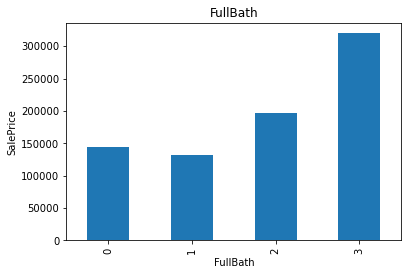

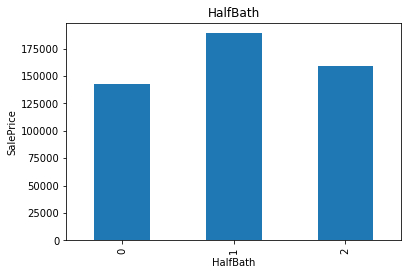

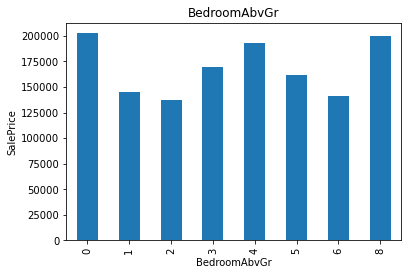

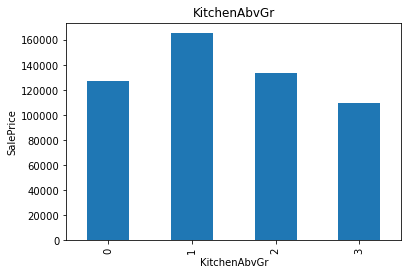

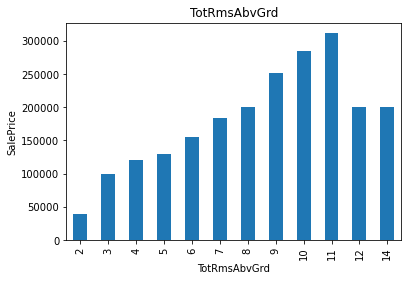

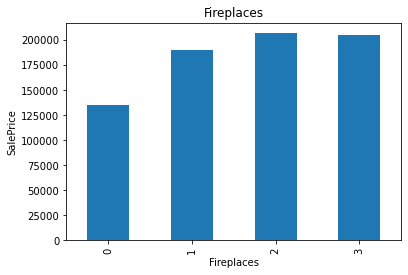

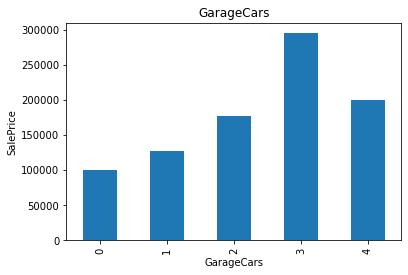

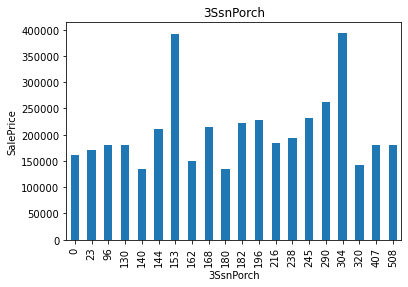

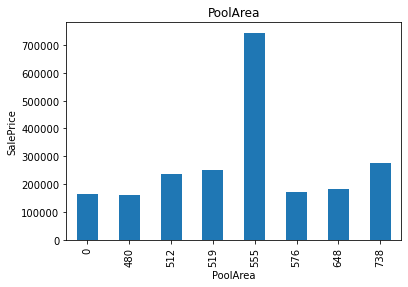

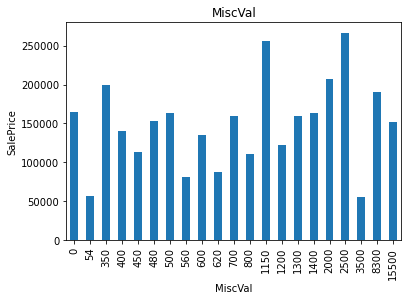

In [92]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    train1=train.copy()
    train1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

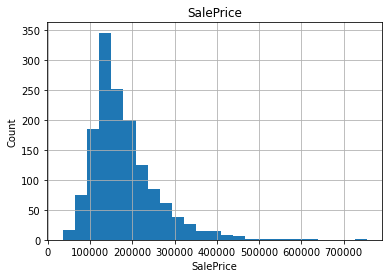

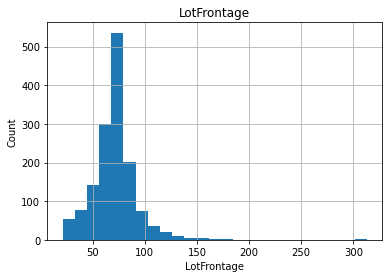

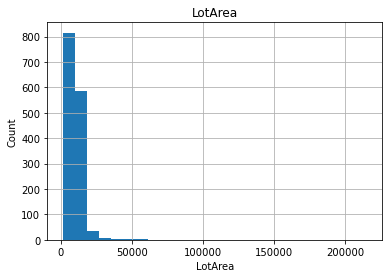

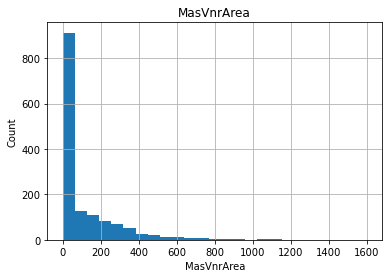

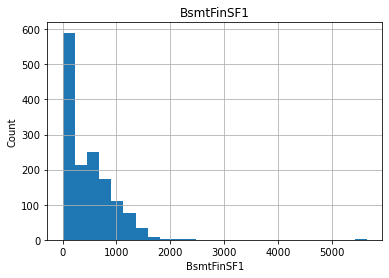

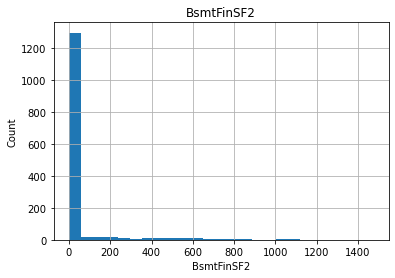

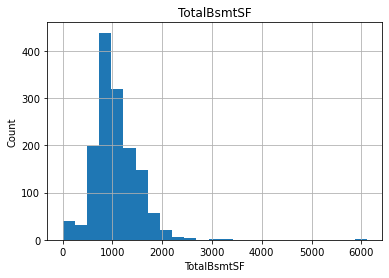

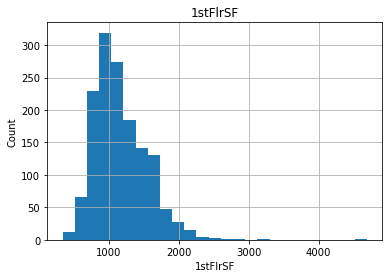

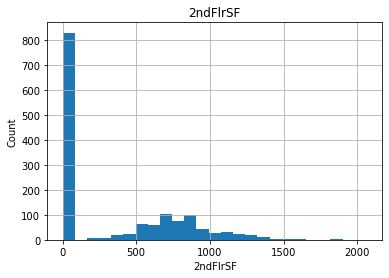

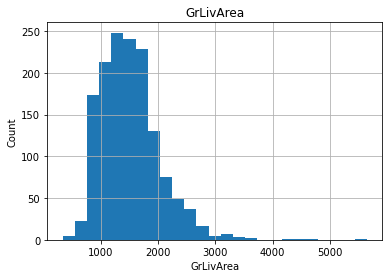

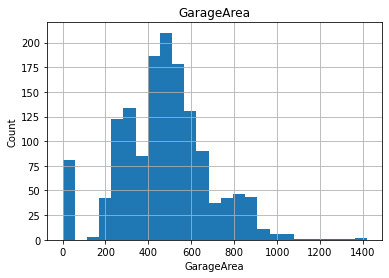

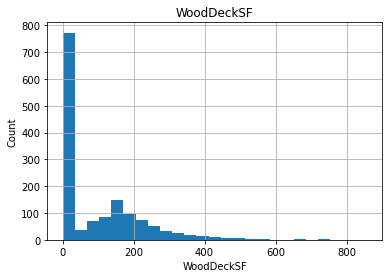

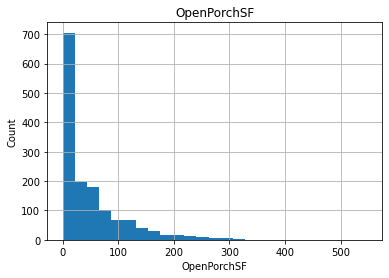

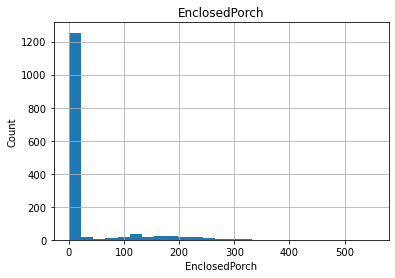

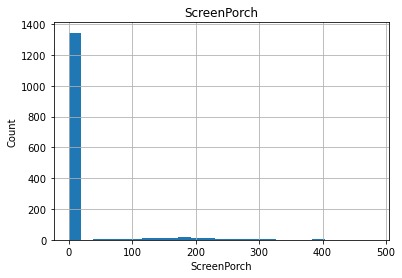

In [93]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    train1=train.copy()
    train1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Encoding categorical variables

In [94]:
train_cat = train.select_dtypes(include='object' )
# train_cat.info()

In [95]:
train_cat = train.select_dtypes(include='object' )
# train_cat.info()
print(train_cat.shape )

for i in train_cat:
    print(i,'=',train_cat[i].nunique(),  train_cat[i].unique() )
train_cat.shape[1]

train_cat.value_counts().sum()

(1460, 36)
MSZoning = 5 ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street = 2 ['Pave' 'Grvl']
LotShape = 4 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour = 4 ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities = 2 ['AllPub' 'NoSeWa']
LotConfig = 5 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope = 3 ['Gtl' 'Mod' 'Sev']
Neighborhood = 25 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 = 9 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
BldgType = 5 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle = 8 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle = 6 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl = 8 ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st = 15 ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace

1460

In [96]:
# train_cat.Neighborhood.value_counts()

In [97]:
# encoding neighborhood values for first 20 most occured values
train_cat.Neighborhood.value_counts().head()

top_20 = [ x for x in train_cat.Neighborhood.value_counts().sort_values(ascending=False).head(20).index ]
print(top_20)
print()


for uq_value in top_20:
    col = 'Neighborhood';
    train_cat[col+'_'+uq_value] = np.where( train_cat['Neighborhood'] == uq_value,1,0 ) 
#to see the new columns created    
#print(train[['Neighborhood']+top_20])
#can dsee all the new values apppended to the list
train_cat
print(train_cat.shape[1])
#print(train_cat.columns)




['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert', 'NridgHt', 'Sawyer', 'NWAmes', 'SawyerW', 'BrkSide', 'Crawfor', 'Mitchel', 'NoRidge', 'Timber', 'IDOTRR', 'ClearCr', 'StoneBr', 'SWISU', 'MeadowV']

56


In [98]:
#Exterior1st
train_cat.Exterior1st.value_counts().head()


top_10 = [ x for x in train_cat.Exterior1st.value_counts().sort_values(ascending=False).head(10).index ]
print(top_10)
print()


for uq_value in top_10:
    col = 'Exterior1st';
    train_cat[col+'_'+ uq_value] = np.where( train_cat['Exterior1st'] == uq_value,1,0) 
# to see the new columns created    
# print(train[['Exterior1st']+top_10])

#can dsee all the new values apppended to the list
train_cat.shape[1]


['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood', 'CemntBd', 'BrkFace', 'WdShing', 'Stucco', 'AsbShng']



66

In [99]:
#RoofMatl
print( train_cat.RoofMatl.value_counts() )
# u can notice last 4 categories have only one value so lets choose only top 5

top_5 = [ x for x in train_cat.RoofMatl.value_counts().sort_values(ascending=False).head(4).index ]
print(top_10)
print()


for uq_value in top_5:
    col = 'RoofMatl';
    train_cat[col+'_'+ uq_value] = np.where( train_cat['RoofMatl'] == uq_value,1,0) 
    
# to see the new columns created    
# print(train[['RoofMatl']+top_10])

#can dsee all the new values apppended to the list
train_cat.shape[1]

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
ClyTile       1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64
['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood', 'CemntBd', 'BrkFace', 'WdShing', 'Stucco', 'AsbShng']



70

### Labelling rare categorical variables (Less frequent)
train_cat['SalePrice']= train['SalePrice']

for feature in train_cat.select_dtypes(exclude=object):
    temp=train_cat.groupby(feature)['SalePrice'].count() / len(train_cat)
    temp_df=temp[temp>0.01].index
    train_cat[feature]=np.where(train_cat[feature].isin(temp_df),train_cat[feature],'Rare_var')


In [100]:
train_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior1st_WdShing,Exterior1st_Stucco,Exterior1st_AsbShng,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShngl,RoofMatl_WdShake
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,...,0,0,0,0,0,0,1,0,0,0
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,1Fam,...,0,0,0,0,0,0,1,0,0,0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,...,0,0,0,0,0,0,1,0,0,0
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,...,0,0,0,0,0,0,1,0,0,0
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,...,0,0,0,0,0,0,1,0,0,0


In [101]:
#now lets drop those 3 columns
train_cat.drop(columns= ['RoofMatl','Exterior1st','Neighborhood'], axis  = 1, inplace = True)

In [102]:
train_cat.select_dtypes(exclude=object).columns

Index(['Neighborhood_NAmes', 'Neighborhood_CollgCr', 'Neighborhood_OldTown',
       'Neighborhood_Edwards', 'Neighborhood_Somerst', 'Neighborhood_Gilbert',
       'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_NWAmes',
       'Neighborhood_SawyerW', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_Mitchel', 'Neighborhood_NoRidge', 'Neighborhood_Timber',
       'Neighborhood_IDOTRR', 'Neighborhood_ClearCr', 'Neighborhood_StoneBr',
       'Neighborhood_SWISU', 'Neighborhood_MeadowV', 'Exterior1st_VinylSd',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_Plywood', 'Exterior1st_CemntBd', 'Exterior1st_BrkFace',
       'Exterior1st_WdShing', 'Exterior1st_Stucco', 'Exterior1st_AsbShng',
       'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl',
       'RoofMatl_WdShake'],
      dtype='object')

In [103]:

train_cat = pd.get_dummies(train_cat,drop_first=True)
train_cat.columns.to_list()
#train_cat.shape[1]

['Neighborhood_NAmes',
 'Neighborhood_CollgCr',
 'Neighborhood_OldTown',
 'Neighborhood_Edwards',
 'Neighborhood_Somerst',
 'Neighborhood_Gilbert',
 'Neighborhood_NridgHt',
 'Neighborhood_Sawyer',
 'Neighborhood_NWAmes',
 'Neighborhood_SawyerW',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_Mitchel',
 'Neighborhood_NoRidge',
 'Neighborhood_Timber',
 'Neighborhood_IDOTRR',
 'Neighborhood_ClearCr',
 'Neighborhood_StoneBr',
 'Neighborhood_SWISU',
 'Neighborhood_MeadowV',
 'Exterior1st_VinylSd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_Plywood',
 'Exterior1st_CemntBd',
 'Exterior1st_BrkFace',
 'Exterior1st_WdShing',
 'Exterior1st_Stucco',
 'Exterior1st_AsbShng',
 'RoofMatl_CompShg',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShngl',
 'RoofMatl_WdShake',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_

In [104]:
# concat two dataframes train_cat and scaled_column_df 
print(train_cat.shape)
type(train_cat)
type(scaled_df_rs)
type(scaled_df_mm)
#print(scaled_columns_df.columns.to_list())
#print(train_cat.columns.to_list())

(1460, 164)


pandas.core.frame.DataFrame

# combining scaled and encoded data together

In [105]:
prep_train_rs =np.concatenate( [scaled_df_rs, train_cat],axis = 1)

prep_traind_rsd = pd.DataFrame(prep_train_rs, columns = ['SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','Neighborhood_NAmes', 'Neighborhood_CollgCr', 'Neighborhood_OldTown', 'Neighborhood_Edwards', 'Neighborhood_Somerst', 'Neighborhood_Gilbert', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_NWAmes', 'Neighborhood_SawyerW', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Mitchel', 'Neighborhood_NoRidge', 'Neighborhood_Timber', 'Neighborhood_IDOTRR', 'Neighborhood_ClearCr', 'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Blmngtn', 'Exterior1st_VinylSd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Wd Sdng', 'Exterior1st_Plywood', 'Exterior1st_CemntBd', 'Exterior1st_BrkFace', 'Exterior1st_WdShing', 'Exterior1st_Stucco', 'Exterior1st_AsbShng', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'RoofMatl_WdShake', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'])
print(prep_traind_rsd.shape)
prep_traind_rsd.head()

(1460, 197)


,SalePrice,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.541506,0.2,-0.265787,-0.254076,0.0,-0.652174,-0.243243,1.193303,0.452790,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.220173,-0.6,0.523686,0.030015,3.0,-0.065217,0.486486,0.000000,0.834679,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.720024,0.2,-0.107893,0.437624,0.0,-0.608696,-0.216216,0.986301,0.143910,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.273728,0.4,-0.528945,0.017663,0.0,1.260870,0.648649,0.000000,-0.235170,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.035406,0.2,0.734213,1.181201,0.0,-0.586957,-0.162162,2.130898,0.381186,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [106]:
prep_train_mm =np.concatenate( [scaled_df_mm, train_cat],axis = 1).

prep_traind_mmd = pd.DataFrame(prep_train_mm, columns = ['SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','Neighborhood_NAmes', 'Neighborhood_CollgCr', 'Neighborhood_OldTown', 'Neighborhood_Edwards', 'Neighborhood_Somerst', 'Neighborhood_Gilbert', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_NWAmes', 'Neighborhood_SawyerW', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Mitchel', 'Neighborhood_NoRidge', 'Neighborhood_Timber', 'Neighborhood_IDOTRR', 'Neighborhood_ClearCr', 'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Blmngtn', 'Exterior1st_VinylSd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Wd Sdng', 'Exterior1st_Plywood', 'Exterior1st_CemntBd', 'Exterior1st_BrkFace', 'Exterior1st_WdShing', 'Exterior1st_Stucco', 'Exterior1st_AsbShng', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'RoofMatl_WdShake', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'])
print(prep_traind_mmd.shape)
prep_traind_mmd.head()

(1460, 197)


,SalePrice,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.24,0.24,0.15,0.03,0.50,0.05,0.12,0.12,0.13,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.20,0.00,0.20,0.04,0.88,0.25,0.57,0.00,0.17,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.26,0.24,0.16,0.05,0.50,0.07,0.13,0.10,0.09,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.15,0.29,0.13,0.04,0.50,0.69,0.67,0.00,0.04,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.30,0.24,0.22,0.06,0.50,0.07,0.17,0.22,0.12,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## combining target exceuded scaled data with one hot encoded data

In [120]:
TE_prep_train_rs =np.concatenate( [TE_scaled_df_rs, train_cat],axis = 1)

TE_prep_traind_rsd = pd.DataFrame(TE_prep_train_rs, columns = ['SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','Neighborhood_NAmes', 'Neighborhood_CollgCr', 'Neighborhood_OldTown', 'Neighborhood_Edwards', 'Neighborhood_Somerst', 'Neighborhood_Gilbert', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_NWAmes', 'Neighborhood_SawyerW', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Mitchel', 'Neighborhood_NoRidge', 'Neighborhood_Timber', 'Neighborhood_IDOTRR', 'Neighborhood_ClearCr', 'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Blmngtn', 'Exterior1st_VinylSd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Wd Sdng', 'Exterior1st_Plywood', 'Exterior1st_CemntBd', 'Exterior1st_BrkFace', 'Exterior1st_WdShing', 'Exterior1st_Stucco', 'Exterior1st_AsbShng', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'RoofMatl_WdShake', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'])
print(TE_prep_traind_rsd.shape)
TE_prep_traind_rsd.head()

(1460, 197)


,SalePrice,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500.0,0.2,-0.265787,-0.254076,0.0,-0.652174,-0.243243,1.193303,0.452790,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,181500.0,-0.6,0.523686,0.030015,3.0,-0.065217,0.486486,0.000000,0.834679,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,223500.0,0.2,-0.107893,0.437624,0.0,-0.608696,-0.216216,0.986301,0.143910,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,140000.0,0.4,-0.528945,0.017663,0.0,1.260870,0.648649,0.000000,-0.235170,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,250000.0,0.2,0.734213,1.181201,0.0,-0.586957,-0.162162,2.130898,0.381186,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [121]:
TE_prep_train_mm =np.concatenate( [TE_scaled_df_mm, train_cat],axis = 1)

TE_prep_traind_mmd = pd.DataFrame(TE_prep_train_mm, columns = ['SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','Neighborhood_NAmes', 'Neighborhood_CollgCr', 'Neighborhood_OldTown', 'Neighborhood_Edwards', 'Neighborhood_Somerst', 'Neighborhood_Gilbert', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_NWAmes', 'Neighborhood_SawyerW', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Mitchel', 'Neighborhood_NoRidge', 'Neighborhood_Timber', 'Neighborhood_IDOTRR', 'Neighborhood_ClearCr', 'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Blmngtn', 'Exterior1st_VinylSd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Wd Sdng', 'Exterior1st_Plywood', 'Exterior1st_CemntBd', 'Exterior1st_BrkFace', 'Exterior1st_WdShing', 'Exterior1st_Stucco', 'Exterior1st_AsbShng', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'RoofMatl_WdShake', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'])
print(TE_prep_traind_mmd.shape)
TE_prep_traind_mmd.head()

(1460, 197)


,SalePrice,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500.0,0.235294,0.150685,0.033420,0.500,0.050725,0.116667,0.12250,0.125089,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,181500.0,0.000000,0.202055,0.038795,0.875,0.246377,0.566667,0.00000,0.173281,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,223500.0,0.235294,0.160959,0.046507,0.500,0.065217,0.133333,0.10125,0.086109,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,140000.0,0.294118,0.133562,0.038561,0.500,0.688406,0.666667,0.00000,0.038271,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,250000.0,0.235294,0.215753,0.060576,0.500,0.072464,0.166667,0.21875,0.116052,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Exporting to CSV FILES

In [122]:
TE_prep_traind_mmd.to_csv('TE_prep_train_mm.csv',index = False)
TE_prep_traind_rsd.to_csv('TE_prep_train_rs.csv',index = False)

In [ ]:
prep_traind_mmd.to_csv('prep_train_mm.csv',index = False)
prep_traind_rsd.to_csv('prep_train_rs.csv',index = False)

# feature selection using selectfrommodel with lasso regression and Robust scaler

In [108]:

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

X_train_rs = prep_traind_rsd.iloc[:,1:]  #independent columns
y_train_rs = prep_traind_rsd.iloc[:,0]    #target column i.e price range  #target column i.e price range


feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train_rs, y_train_rs)


feature_sel_model.get_support()
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train_rs.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train_rs.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 196
selected features: 57


In [109]:
# feature_sel_model.get_support()
# let's print the number of total and selected features

In [110]:
selected_feat

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'Neighborhood_Edwards', 'Neighborhood_Somerst', 'Neighborhood_NridgHt',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_SWISU',
       'Exterior1st_BrkFace', 'MSZoning_RM', 'LotConfig_CulDSac',
       'Condition1_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'MasVnrType_BrkFace', 'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'HeatingQC_Gd', 'HeatingQC_TA', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Typ', 'FireplaceQu

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(train_numcol.corr(), annot= True, fmt ='.1f')


 

## calculating feat_importances  from extratreesregressor from minmaxscaler

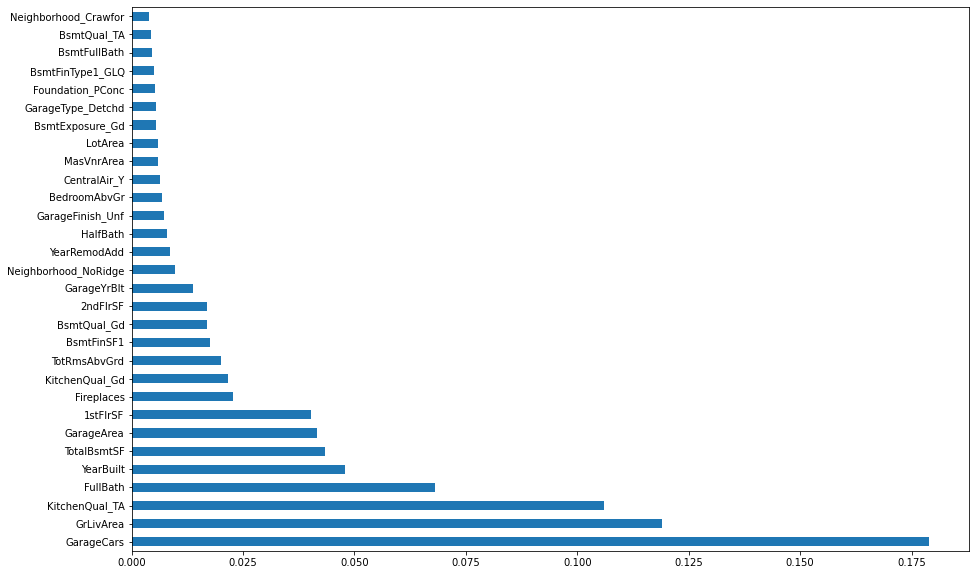

In [112]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

X = prep_traind_mmd.iloc[:,1:]  #independent columns
y = prep_traind_mmd.iloc[:,0]    #target column i.e price range  #target column i.e price range

model = ExtraTreesRegressor()
model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

feat_importances_mm = pd.Series(model.feature_importances_, index=X.columns)

#plot graph of feature importances for better visualization
plt.figure(figsize=(15,10))
feat_importances_mm.nlargest(30).plot(kind='barh')
plt.show()

## calculating feat_importances  from extratreesregressor from  Robust scaler

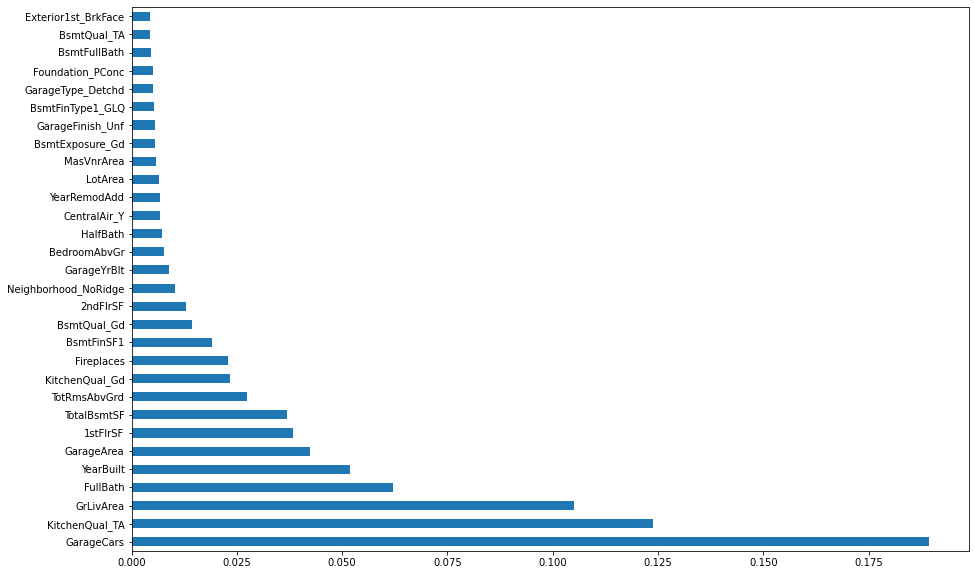

In [114]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

X = prep_traind_rsd.iloc[:,1:]  #independent columns
y = prep_traind_rsd.iloc[:,0]    #target column i.e price range  #target column i.e price range

model = ExtraTreesRegressor()
model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances_rs = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(15,10))
feat_importances_rs.nlargest(30).plot(kind='barh')
plt.show()

In [118]:
feat_importances_rs.nlargest(30).index,feat_importances_mm.nlargest(30).index

(Index(['GarageCars', 'KitchenQual_TA', 'GrLivArea', 'FullBath', 'YearBuilt',
        'GarageArea', '1stFlrSF', 'TotalBsmtSF', 'TotRmsAbvGrd',
        'KitchenQual_Gd', 'Fireplaces', 'BsmtFinSF1', 'BsmtQual_Gd', '2ndFlrSF',
        'Neighborhood_NoRidge', 'GarageYrBlt', 'BedroomAbvGr', 'HalfBath',
        'CentralAir_Y', 'YearRemodAdd', 'LotArea', 'MasVnrArea',
        'BsmtExposure_Gd', 'GarageFinish_Unf', 'BsmtFinType1_GLQ',
        'GarageType_Detchd', 'Foundation_PConc', 'BsmtFullBath', 'BsmtQual_TA',
        'Exterior1st_BrkFace'],
       dtype='object'),
 Index(['GarageCars', 'GrLivArea', 'KitchenQual_TA', 'FullBath', 'YearBuilt',
        'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'Fireplaces', 'KitchenQual_Gd',
        'TotRmsAbvGrd', 'BsmtFinSF1', 'BsmtQual_Gd', '2ndFlrSF', 'GarageYrBlt',
        'Neighborhood_NoRidge', 'YearRemodAdd', 'HalfBath', 'GarageFinish_Unf',
        'BedroomAbvGr', 'CentralAir_Y', 'MasVnrArea', 'LotArea',
        'BsmtExposure_Gd', 'GarageType_Detchd', '

## TE_SCALED select fromodel with robustscaler

In [124]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

TE_X_train_rs = TE_prep_traind_rsd.iloc[:,1:]  #independent columns
TE_y_train_rs = TE_prep_traind_rsd.iloc[:,0]    #target column i.e price range  #target column i.e price range


feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(TE_X_train_rs, TE_y_train_rs)


feature_sel_model.get_support()
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = TE_X_train_rs.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((TE_X_train_rs.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 196
selected features: 196


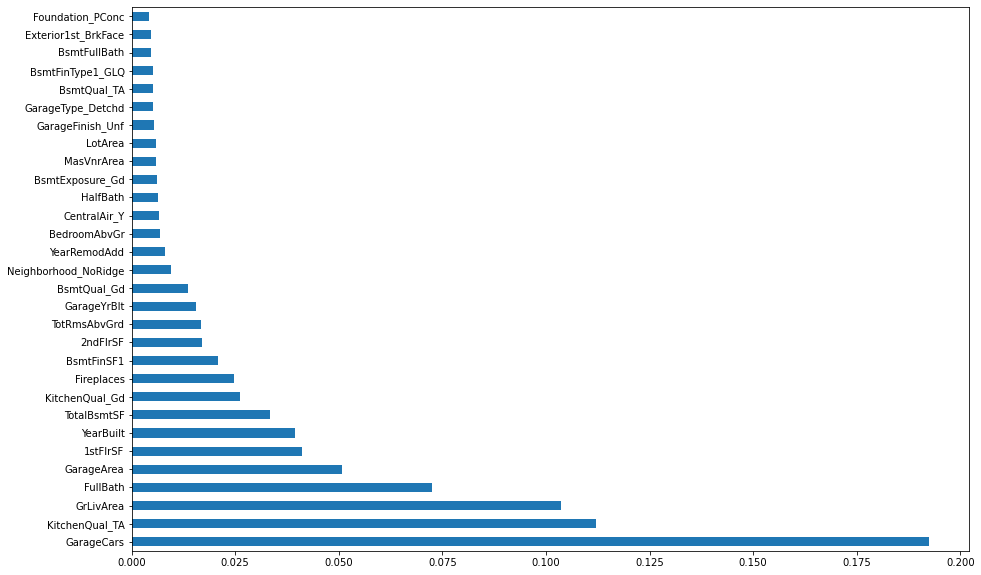

In [129]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

T_X = TE_prep_traind_rsd.iloc[:,1:]  #independent columns
T_y = TE_prep_traind_rsd.iloc[:,0]    #target column i.e price range  #target column i.e price range

model = ExtraTreesRegressor()
model.fit(T_X,T_y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
TE_feat_importances_rs = pd.Series(model.feature_importances_, index=T_X.columns)
plt.figure(figsize=(15,10))
TE_feat_importances_rs.nlargest(30).plot(kind='barh')
plt.show()

In [133]:
TE_feat_importances_rs.nlargest(30).index

Index(['GarageCars', 'KitchenQual_TA', 'GrLivArea', 'FullBath', 'GarageArea',
       '1stFlrSF', 'YearBuilt', 'TotalBsmtSF', 'KitchenQual_Gd', 'Fireplaces',
       'BsmtFinSF1', '2ndFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'BsmtQual_Gd',
       'Neighborhood_NoRidge', 'YearRemodAdd', 'BedroomAbvGr', 'CentralAir_Y',
       'HalfBath', 'BsmtExposure_Gd', 'MasVnrArea', 'LotArea',
       'GarageFinish_Unf', 'GarageType_Detchd', 'BsmtQual_TA',
       'BsmtFinType1_GLQ', 'BsmtFullBath', 'Exterior1st_BrkFace',
       'Foundation_PConc'],
      dtype='object')

In [117]:
# ! pip install mlxtend

x= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'Neighborhood_Edwards', 'Neighborhood_Somerst', 'Neighborhood_NridgHt',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr',
       'Exterior1st_BrkFace', 'MSZoning_RM',
       'Condition1_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'MasVnrType_BrkFace', 'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'HeatingQC_Gd', 'HeatingQC_TA', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Typ', 'FireplaceQu_TA',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleType_New']

y = prep_traind_mmd.iloc[:,0]    #target column i.e price range  #target column i.e price range


from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston


 #independent columns


lr = LinearRegression()

efs = EFS(lr, 
          min_features=10,
          max_features=25,
          scoring='neg_mean_squared_error',
          cv=2)

efs.fit(X, y)

print('Best MSE score: %.2f' % efs.best_score_ * (-1))
print('Best subset:', efs.best_idx_)